## Table of Contents
<ul>
<li><a href="#data_loading">data_loading</a></li>
<li><a href="#data_cleanning">data_cleanning</a></li>
<li><a href="#feature_engineering">feature_engineering</a></li>

<li><a href="#cleanning_summary">cleanning_summary</a></li>    
<li><a href="#features_normalize_and_onehot_encoding">features_normalize_and_onehot_encoding</a></li>
<li><a href="#dealing_with_imbalanced_data">dealing_with_imbalanced_data</a></li>
<li><a href="#building_models">building_models</a></li>
1.) log regression<br>
2.) log_SGD<br>
3.) SVC<br>
4.) SVC_SGD<br>
5.) random forest<br>
6.) XGBoosting<br>
7.) ADABoosting<br>
8.) naive base<br>
<li><a href="#load_test_set">load_test_set</a></li>
<li><a href="#transfer_test_set_as_We_did_with_train_set">transfer_test_set_as_We_did_with_train_set</a></li>
<li><a href="#apply_trained_models_on_test_set">apply_trained_models_on_test_set</a></li>
<li><a href="#compare_results">compare_results</a></li>
</ul>
                

In [1]:
import pandas as pd 
import numpy as np

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression , SGDClassifier ,LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix ,f1_score , accuracy_score , roc_auc_score
from sklearn.model_selection import cross_val_score , cross_val_predict , GridSearchCV
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import sys
sys.path.append('D:\Bi electric scolership\EDA')

In [2]:
from script import eda_script

<a id='data_loading'></a>
## loading and explore data using our script:

DataFrame : 


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


data info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2666 non-null   object 
 1   account_length          2666 non-null   int64  
 2   area_code               2666 non-null   int64  
 3   international_plan      2666 non-null   object 
 4   voice_mail_plan         2666 non-null   object 
 5   number_vmail_messages   2666 non-null   int64  
 6   total_day_minutes       2666 non-null   float64
 7   total_day_calls         2666 non-null   int64  
 8   total_day_charge        2666 non-null   float64
 9   total_eve_minutes       2666 non-null   float64
 10  total_eve_calls         2666 non-null   int64  
 11  total_eve_charge        2666 non-null   float64
 12  total_night_minutes     2666 non-null   float64
 13  total_night_calls       2666 non-null   int64  
 14  total_night_charge      266

,count,mean,std,min,25%,50%,75%,max
account_length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
area_code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
number_vmail_messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
total_day_minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
total_day_calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
total_day_charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
total_eve_minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
total_eve_calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
total_eve_charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
total_night_minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


NaN percentage for each column : 


,name,percentage
0,state,0.0%
1,account_length,0.0%
2,area_code,0.0%
3,international_plan,0.0%
4,voice_mail_plan,0.0%
5,number_vmail_messages,0.0%
6,total_day_minutes,0.0%
7,total_day_calls,0.0%
8,total_day_charge,0.0%
9,total_eve_minutes,0.0%


there is no NaNs in data to impute
check skewness for numerical after imputing : 


,col_name,skew_value,skew_type
0,account_length,0.079,positive
1,area_code,1.110,positive
2,number_vmail_messages,1.271,positive
3,total_day_minutes,-0.053,negative
4,total_day_calls,-0.128,negative
5,total_day_charge,-0.053,negative
6,total_eve_minutes,-0.013,negative
7,total_eve_calls,-0.065,negative
8,total_eve_charge,-0.013,negative
9,total_night_minutes,0.023,positive


count values for categorical columns : 
state column's count values : 


,value,count
0,WV,88
1,MN,70
2,NY,68
3,VA,67
4,AL,66
5,OH,66
6,WY,66
7,OR,62
8,NV,61
9,WI,61


international_plan column's count values : 


,value,count
0,No,2396
1,Yes,270


voice_mail_plan column's count values : 


,value,count
0,No,1933
1,Yes,733


churn column's count values : 


,value,count
0,False,2278
1,True,388


some plots : 


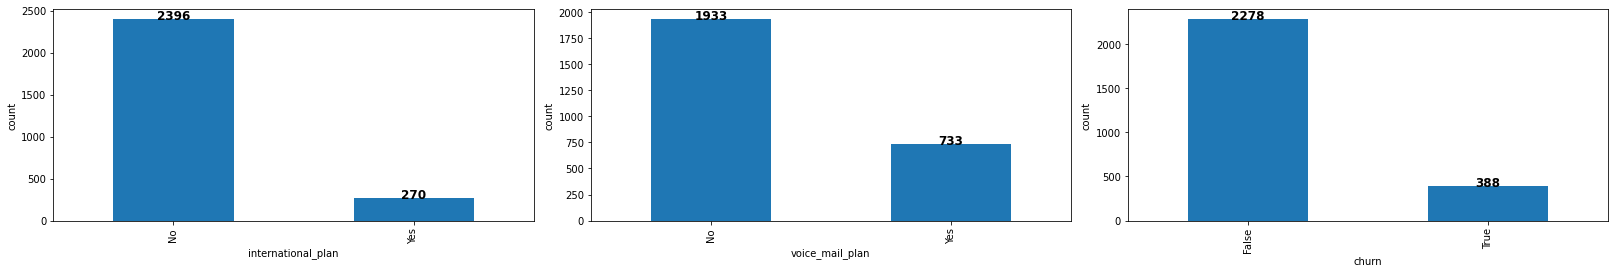

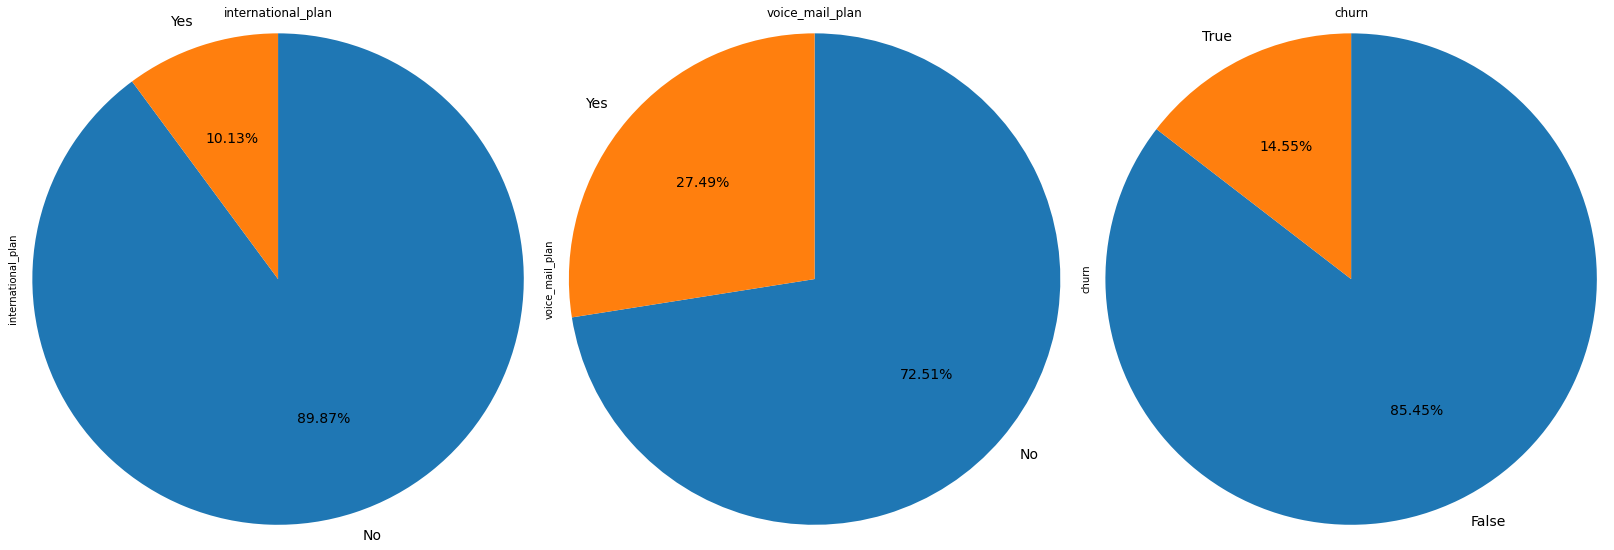

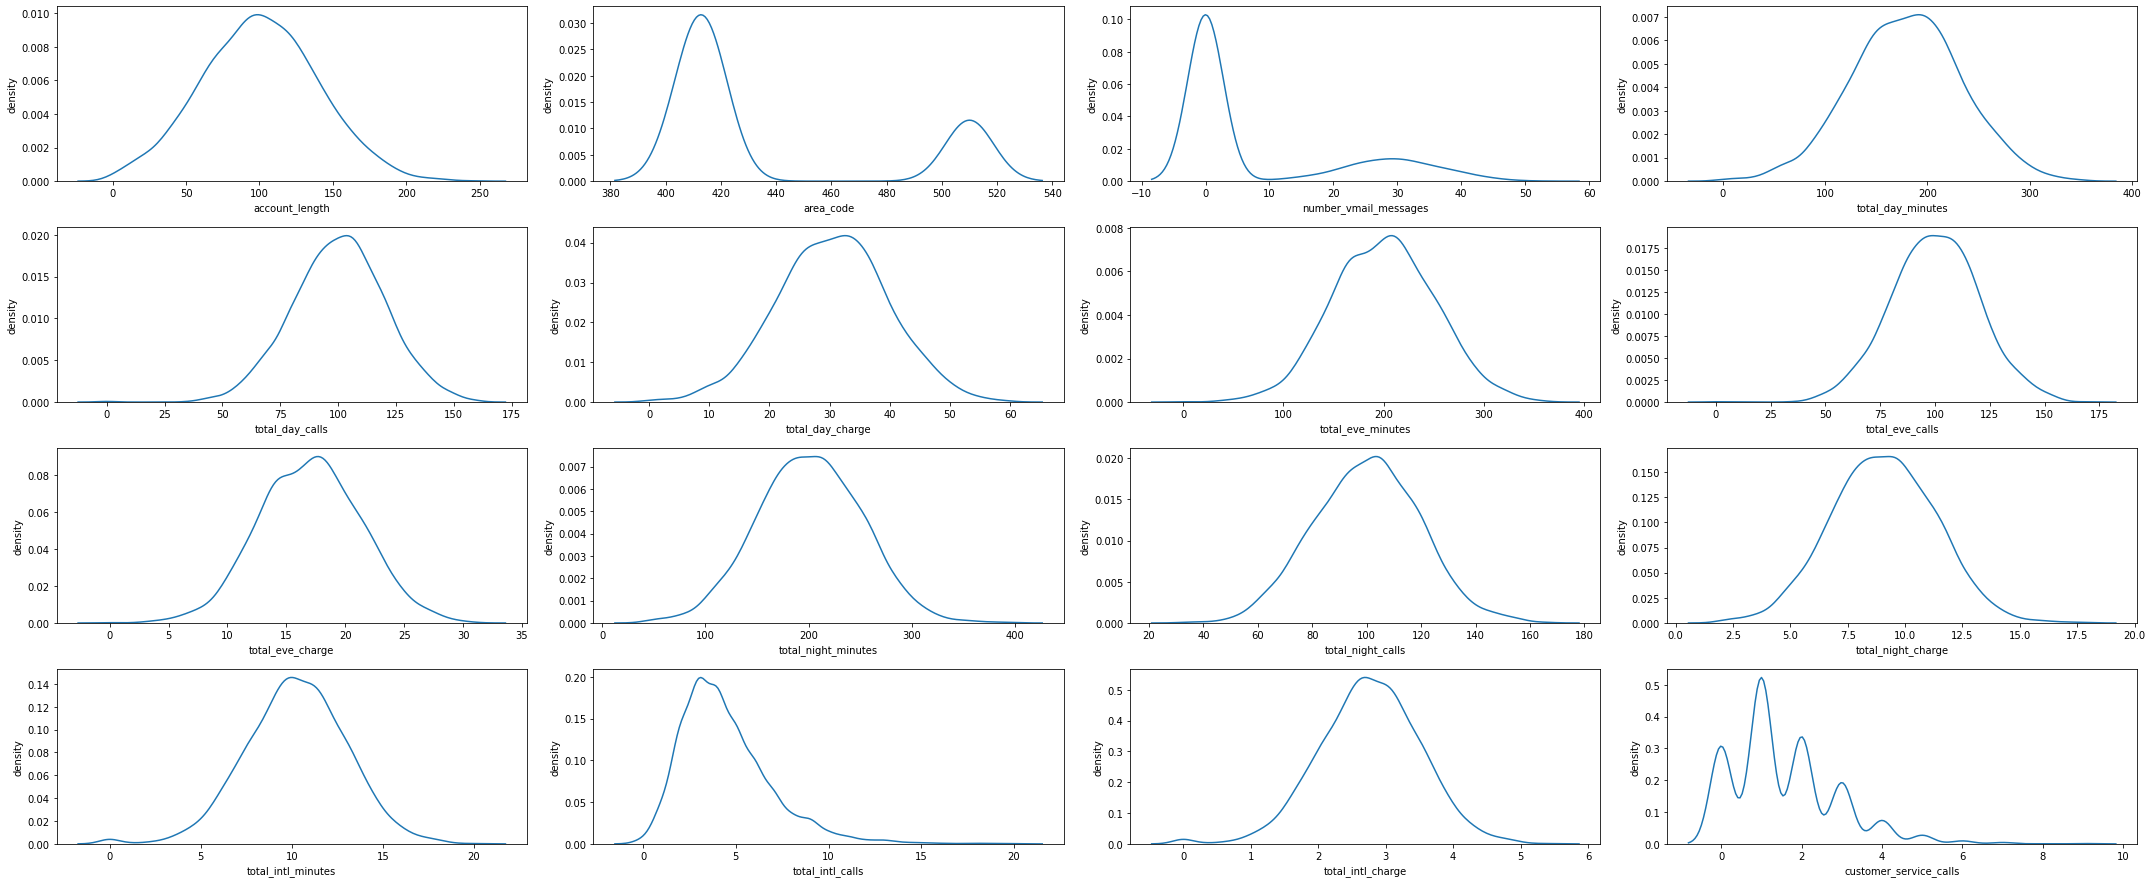

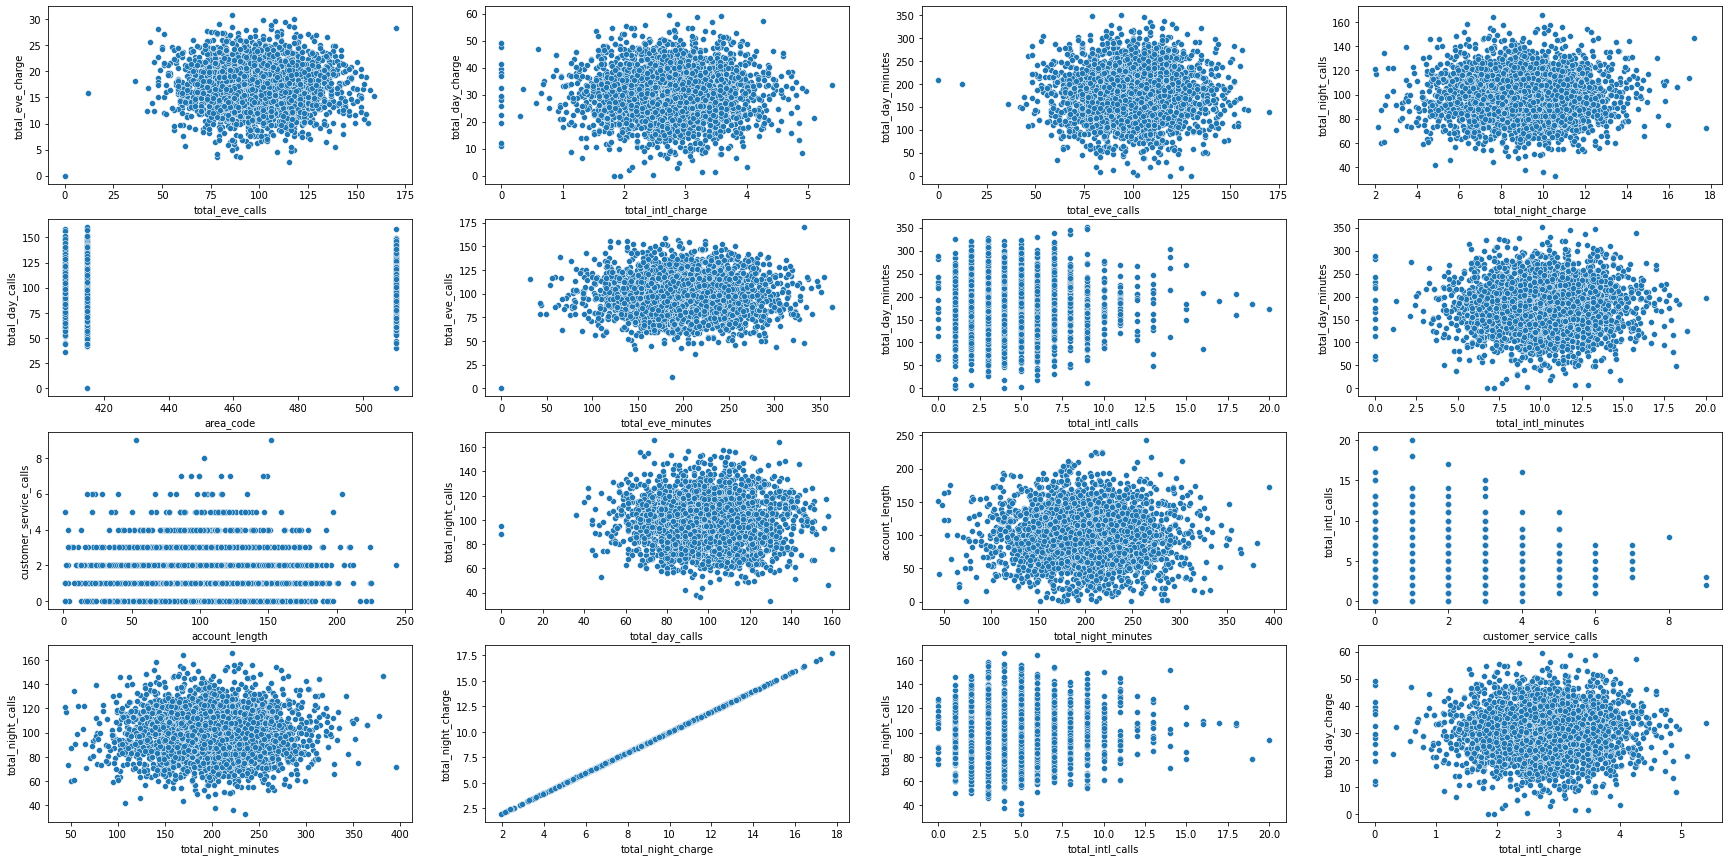

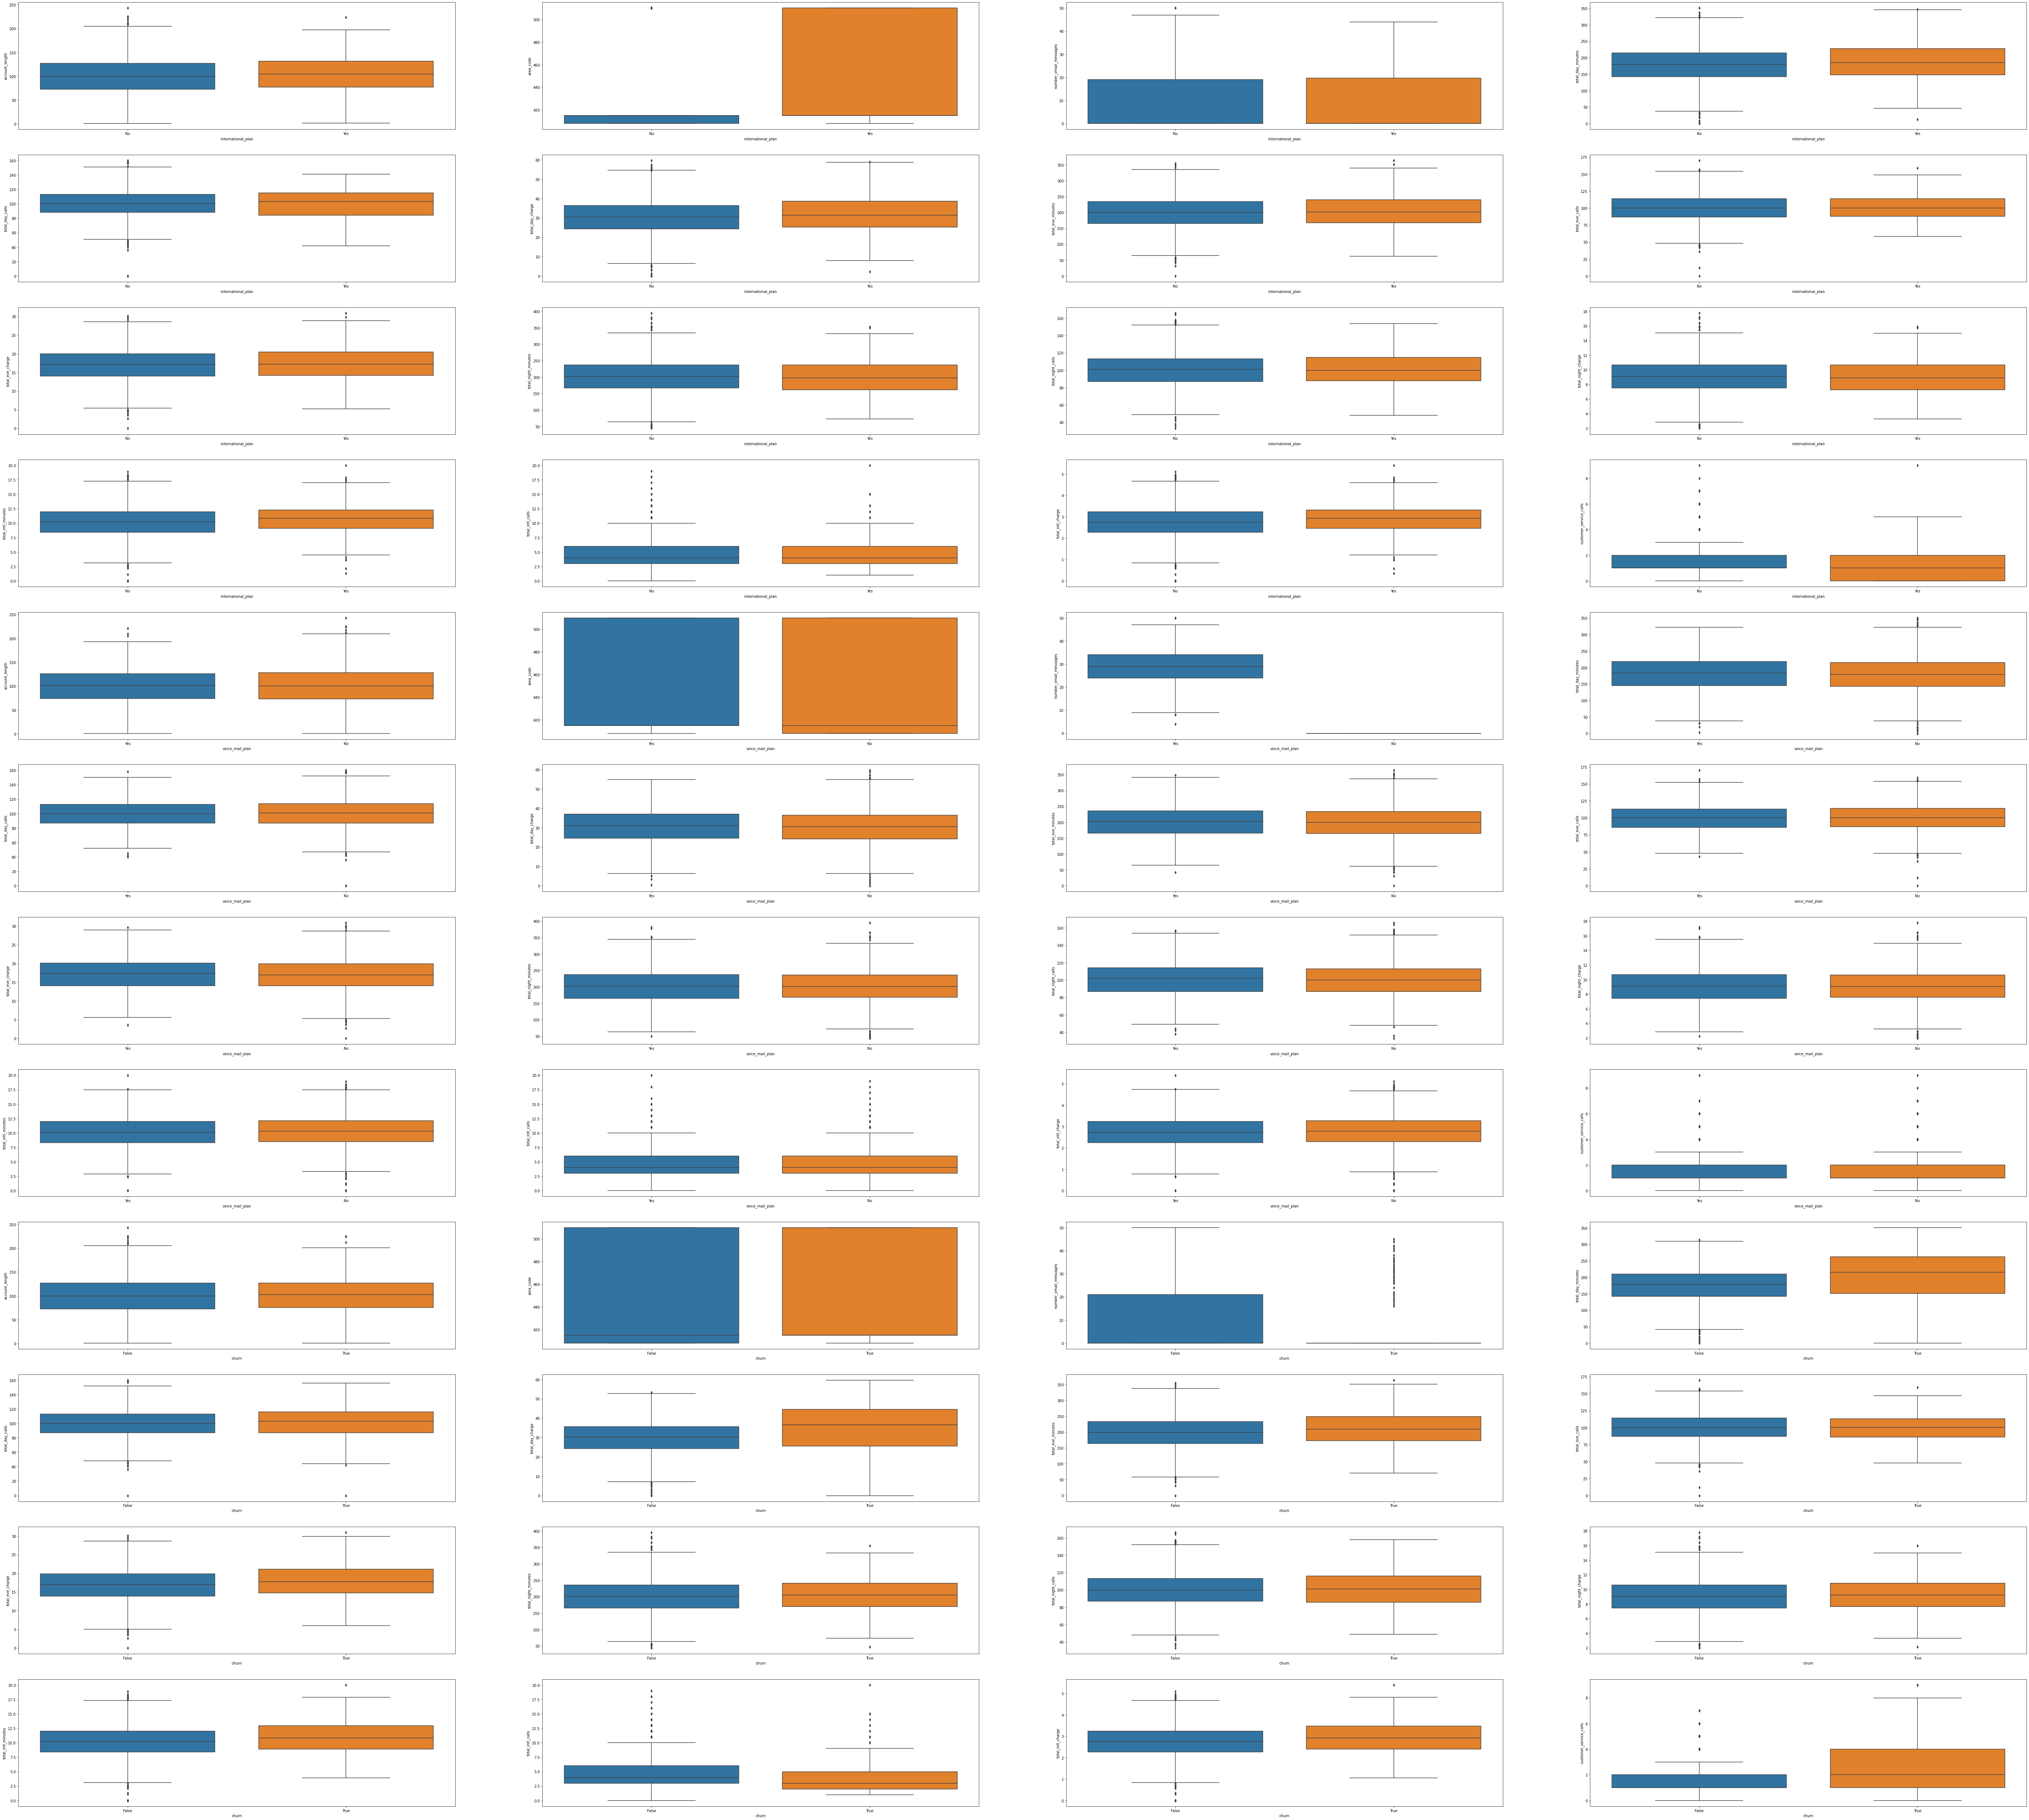

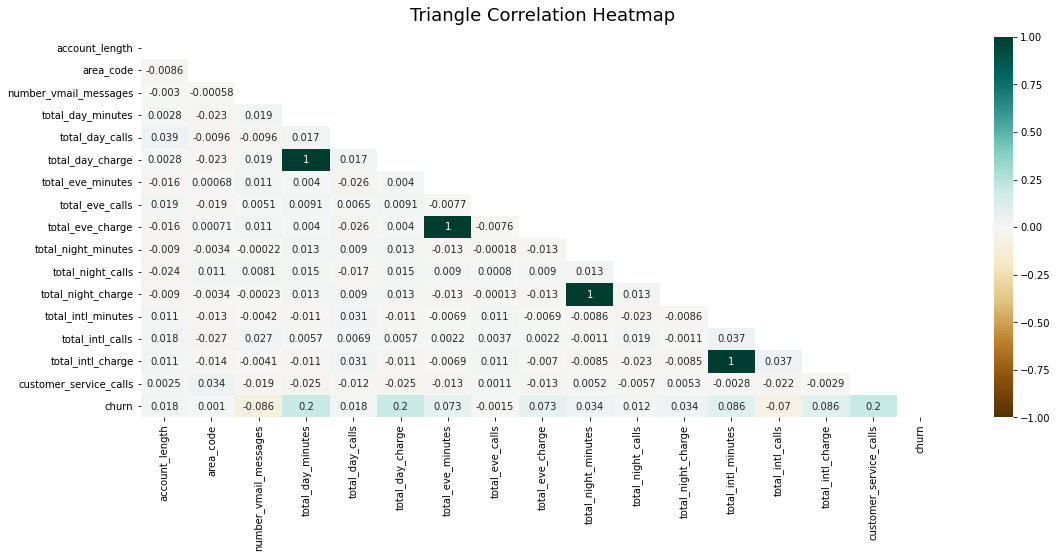

In [3]:
df = eda_script('./churn-bigml-80.csv')

> there is a strong correlation betweeen `total min columns and charge columns`

> most of the column has similar values for mean and median so we can say there is no outliers
- at least not very obvious one that needs handiling

<a id='data_cleanning'></a>
## cleanning data:

- first we can see that it's a classification problem

In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_') # the same idea to use str methods i should use .str

type(df.columns) 
- it's type is : `pandas.core.indexes.base.Index`
- so i need to convert indexes to str and that is why i used .str `pandas.core.strings.accessor.StringMethods` and then form str class i will call lowe
- note that in dataframe class columns is variable so i accessed it using the `.name` only not with `.name()`

In [5]:
type(df.columns.str)

pandas.core.strings.accessor.StringMethods

In [6]:
len(df['state'].unique())

51

- i may use `state column` for analysis but not for the model because it has alot of unique value , so i should consider dropping it before the model

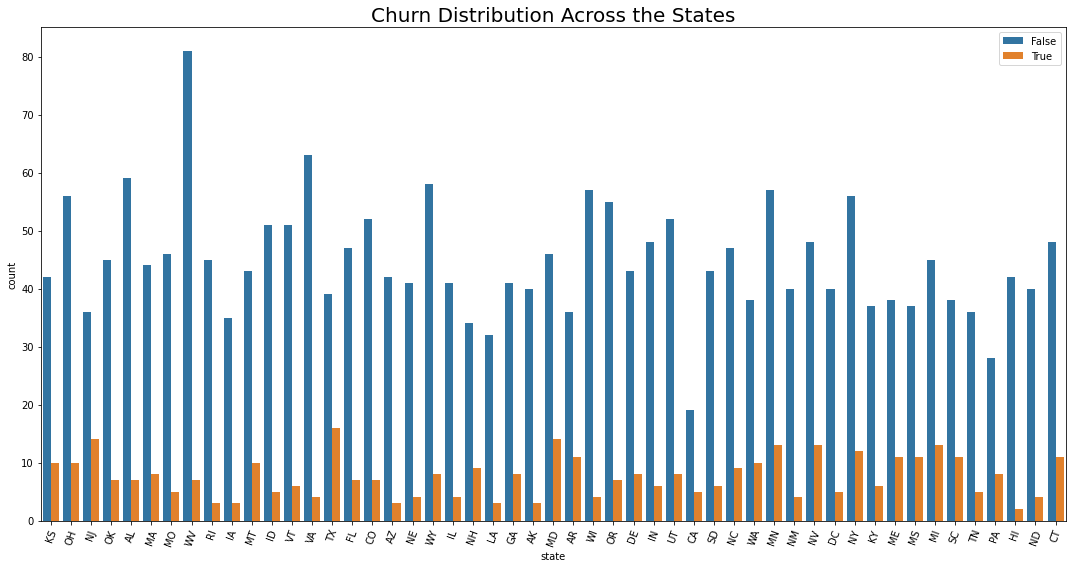

In [7]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'state', data = df, hue = 'churn')
plt.xticks(rotation = '70')
plt.title('Churn Distribution Across the States', fontsize = '20')
plt.legend()
plt.tight_layout()
plt.show();

In [8]:
len(df['account_length'].unique())

205

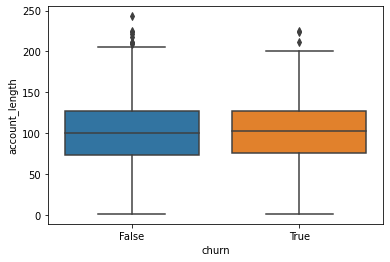

In [9]:
sns.boxplot('churn', 'account_length', data = df);

> there this overlap so `account_length` is not useful
- i will drop `account_length` column

In [10]:
len(df['area_code'].unique())
# we only have three unique value so i will convert this column from int to categorical and get which area for each code

3

In [11]:
df['area_code'].unique()

array([415, 408, 510], dtype=int64)

- 415  -> san_francisco
- 408  -> san_jose
- 510  -> northern_california 

In [12]:
df['area_code'] = df['area_code'].replace(415,'san_francisco')
df['area_code'] = df['area_code'].replace(408,'san_jose')
df['area_code'] = df['area_code'].replace(510,'northern_california')

In [13]:
df['area_code'].unique()  # done

array(['san_francisco', 'san_jose', 'northern_california'], dtype=object)

### bivariate plot for categorical variables :

In [14]:
from script import seperate_columns
numerical_cols , cat_cols = seperate_columns(df)
cat_cols = cat_cols[:-1] # to remove target column

In [15]:
cat_cols

['state', 'area_code', 'international_plan', 'voice_mail_plan']

In [16]:
len(numerical_cols)

15

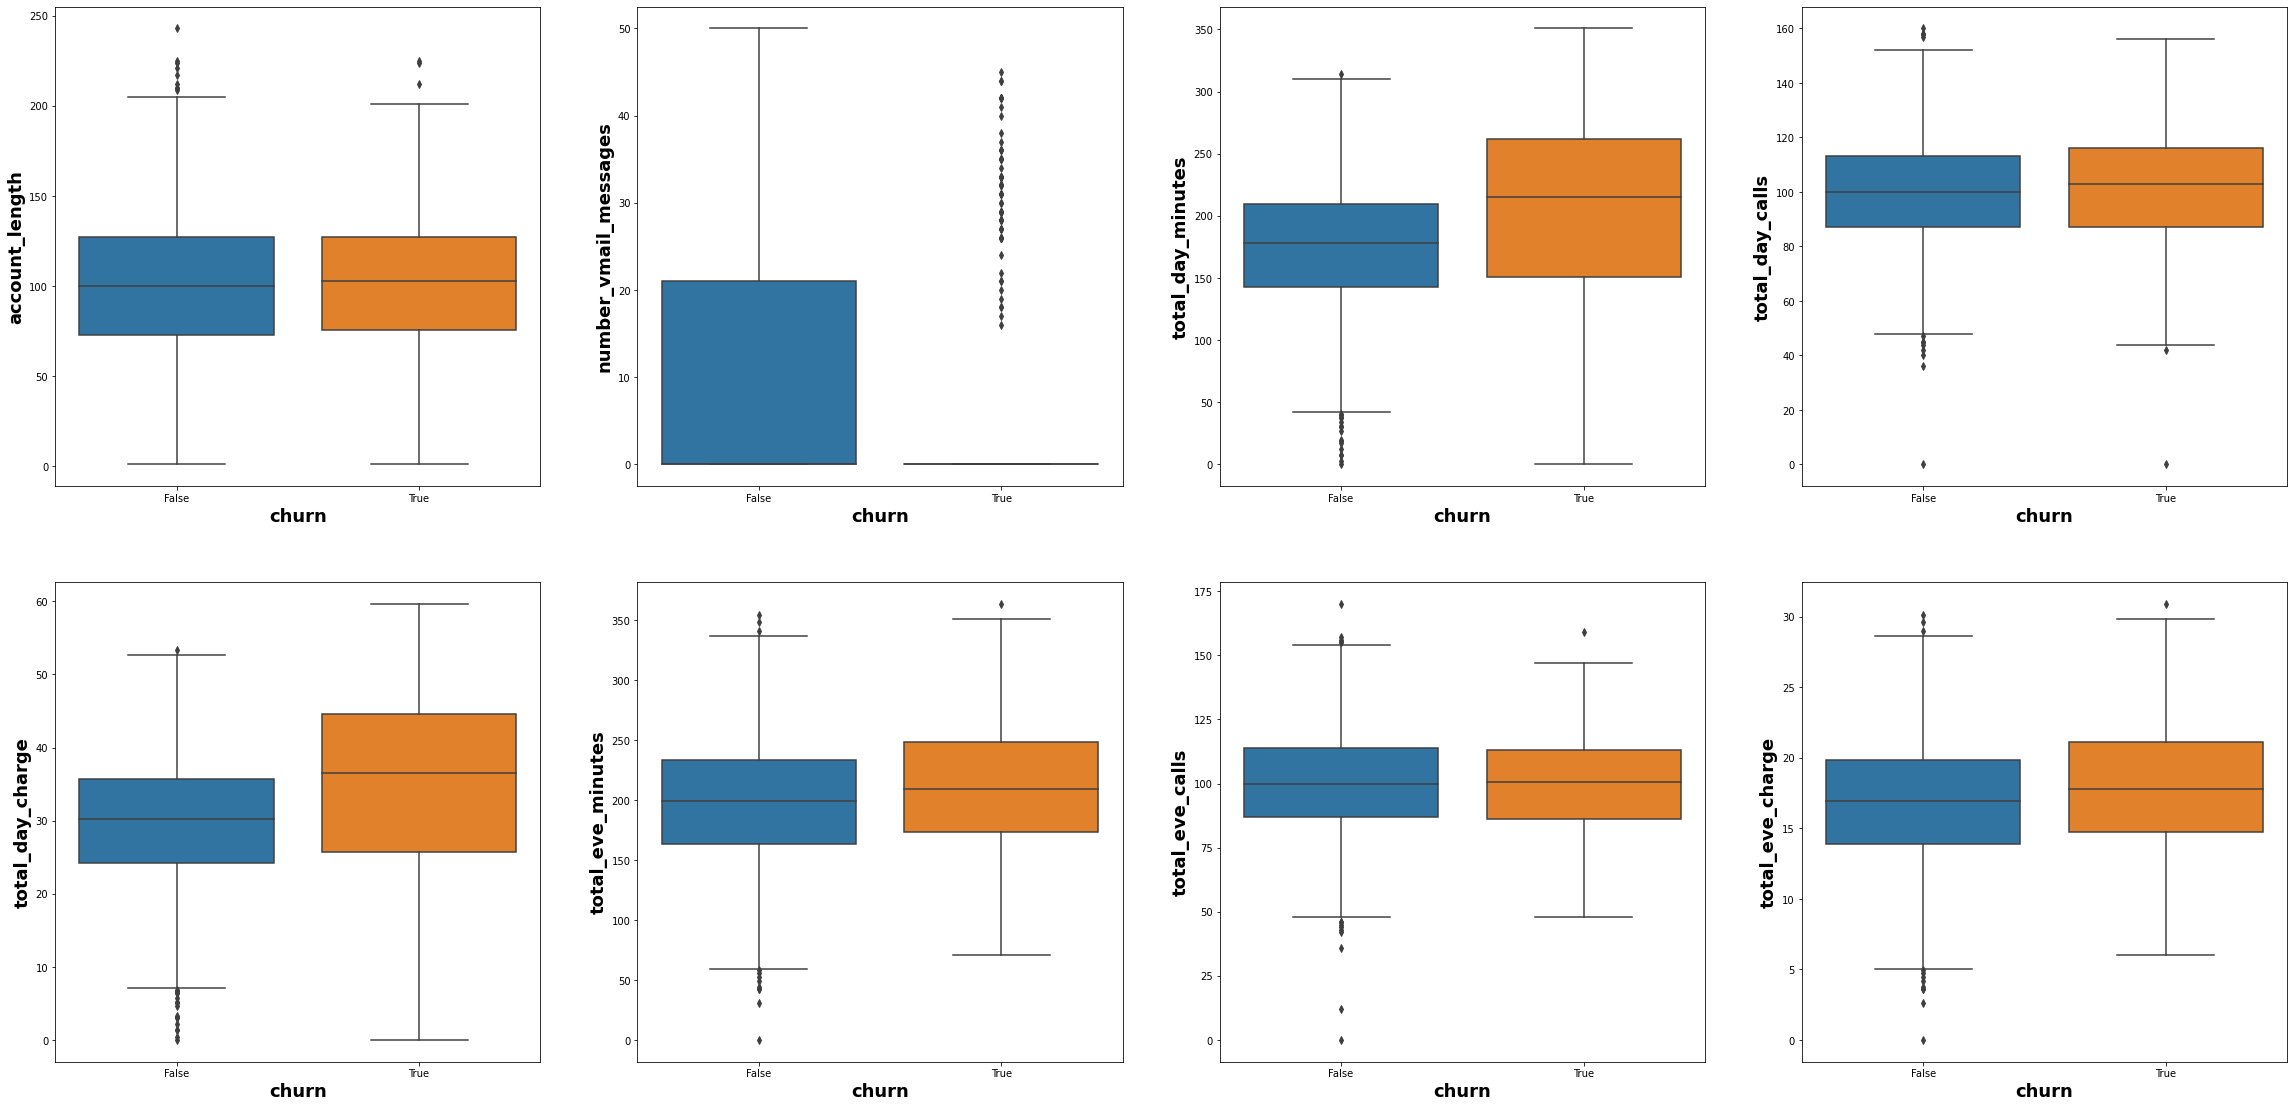

In [17]:
from script import draw_box
draw_box(df , ['churn'] , numerical_cols[0:8])

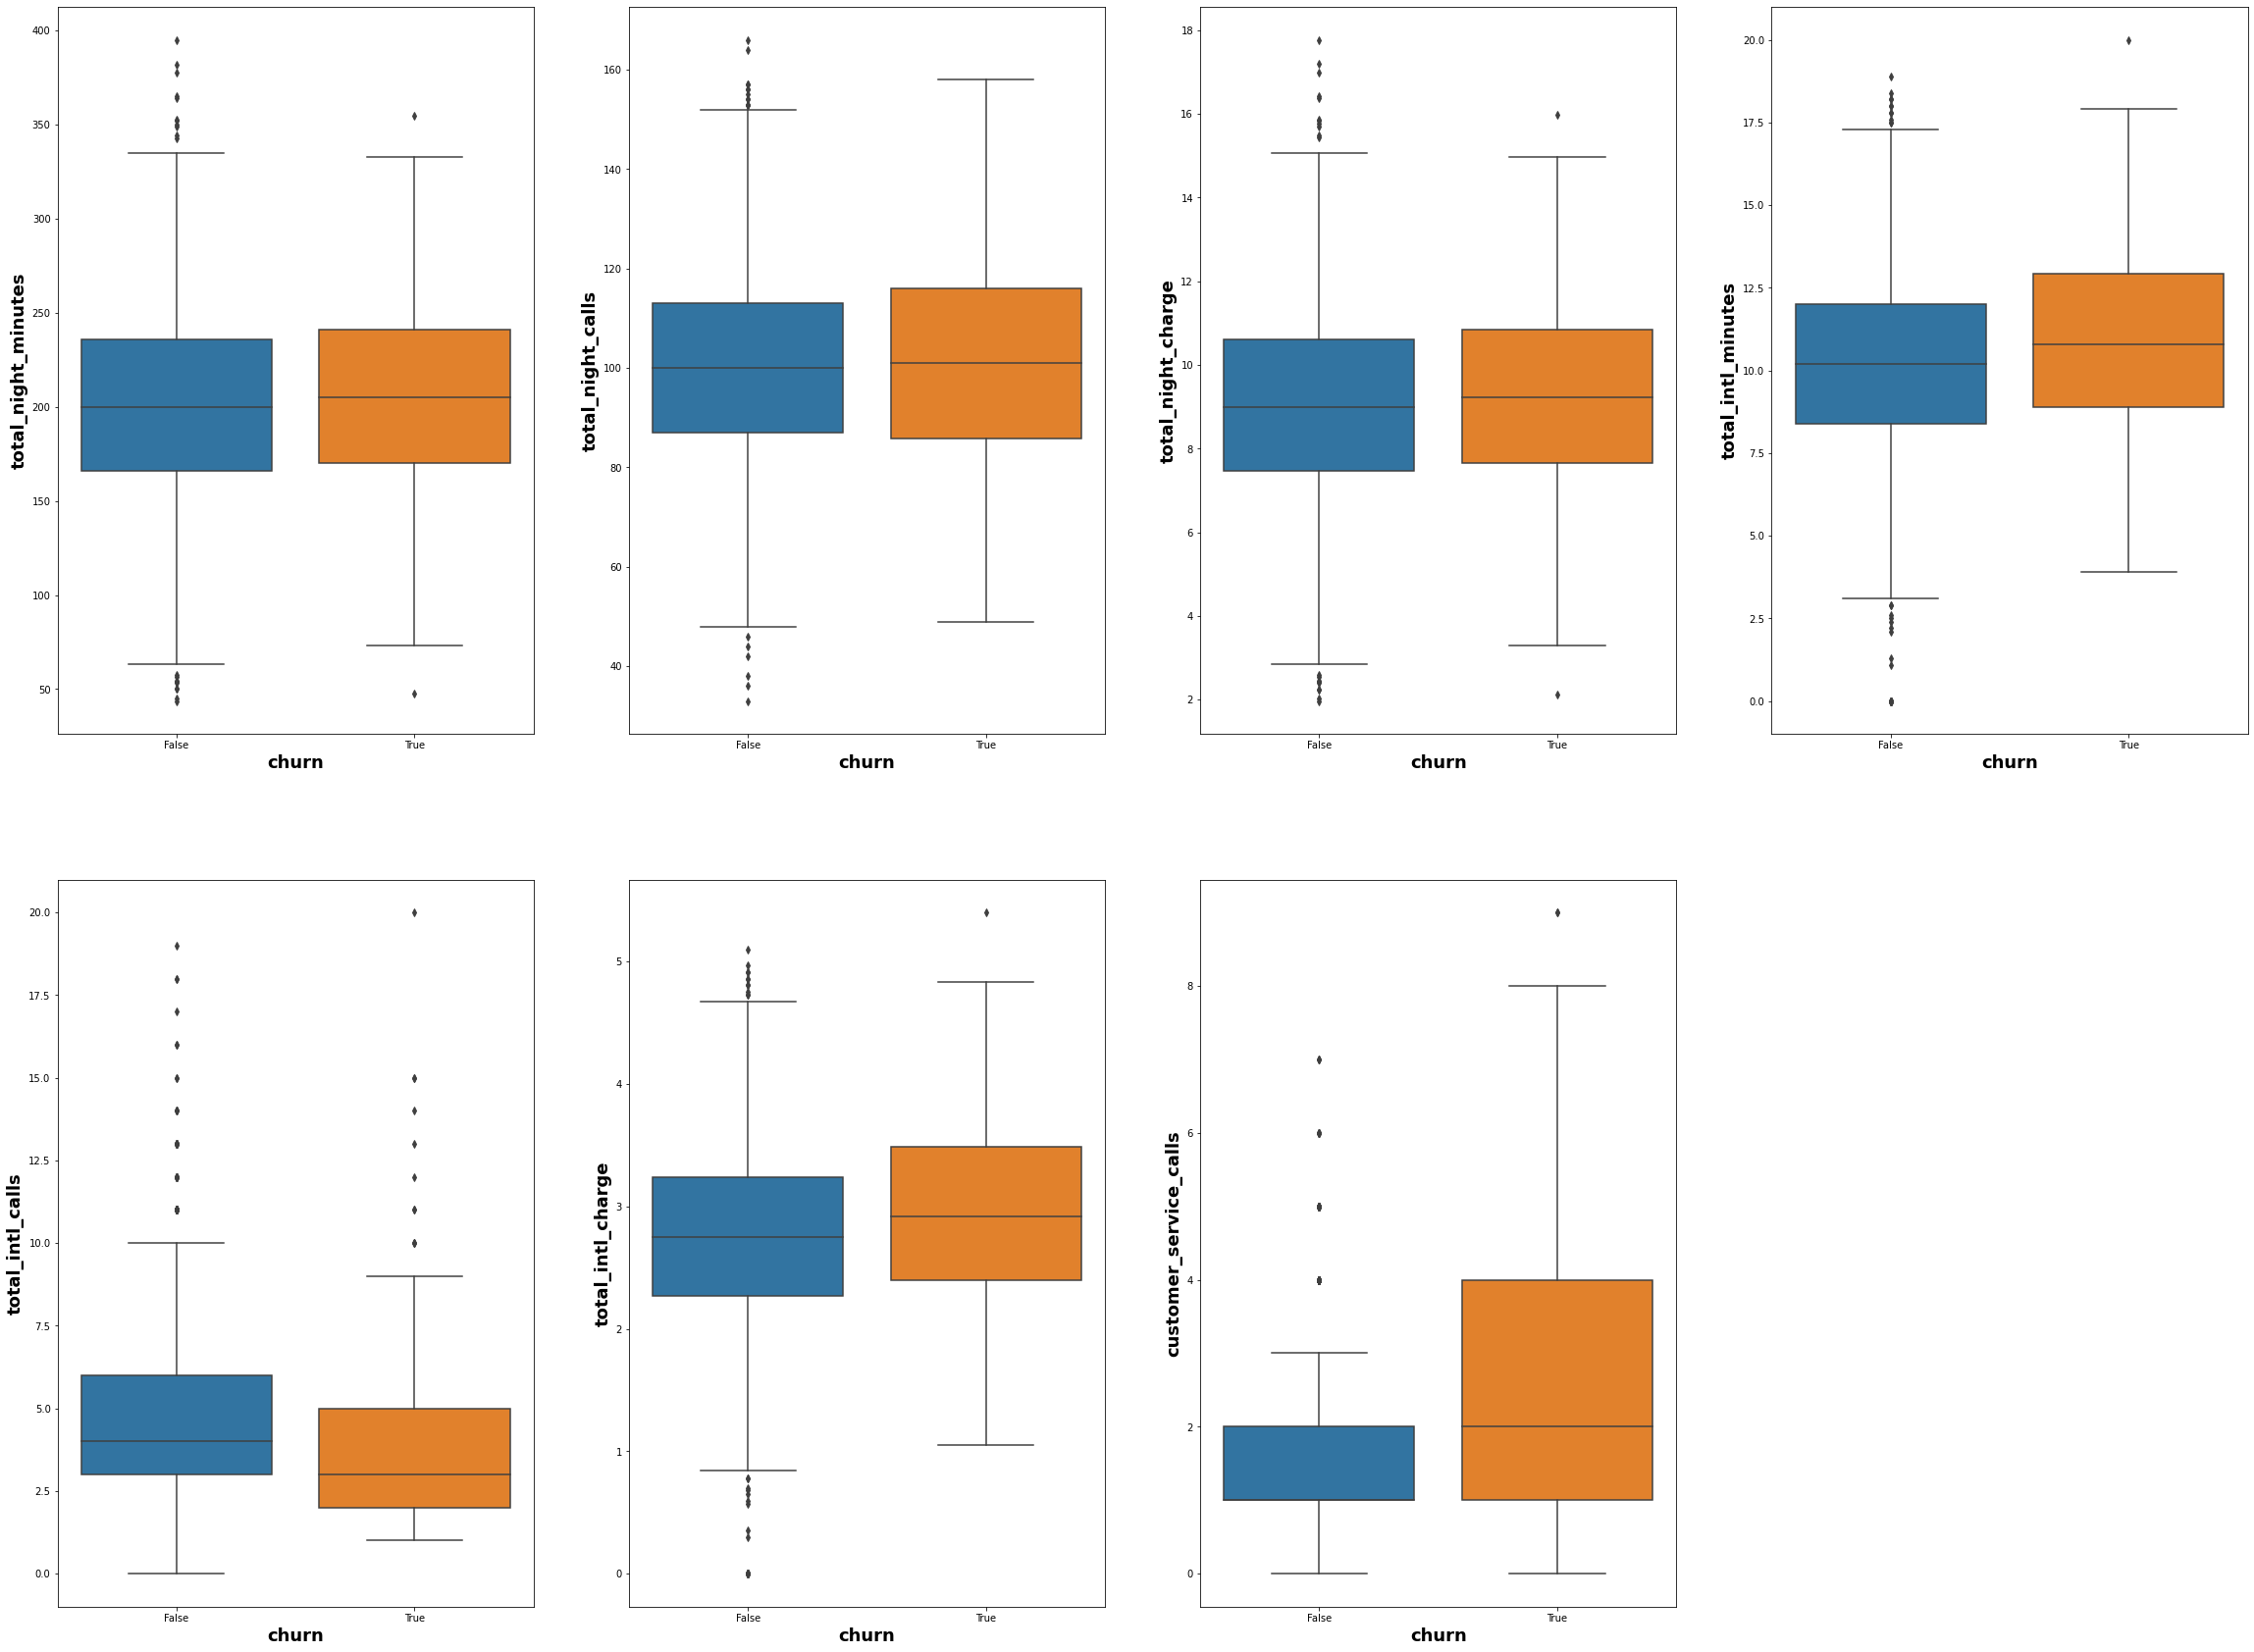

In [18]:
draw_box(df , ['churn'] , numerical_cols[8:])

> we can see that there are too many columns that we can murge to get a new representive column
<a id='feature_engineering'></a>
## feature_engineering:

In [19]:
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls'] 
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']+ df['total_intl_charge']

In [20]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_calls,total_minutes,total_charge
0,KS,128,san_francisco,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,303,717.2,75.56
1,OH,107,san_francisco,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,332,625.2,59.24
2,NJ,137,san_francisco,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,333,539.4,62.29
3,OH,84,san_jose,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,255,564.8,66.80
4,OK,75,san_francisco,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,359,512.0,52.09


In [21]:
cols = ['total_calls',	'total_minutes',	'total_charge']

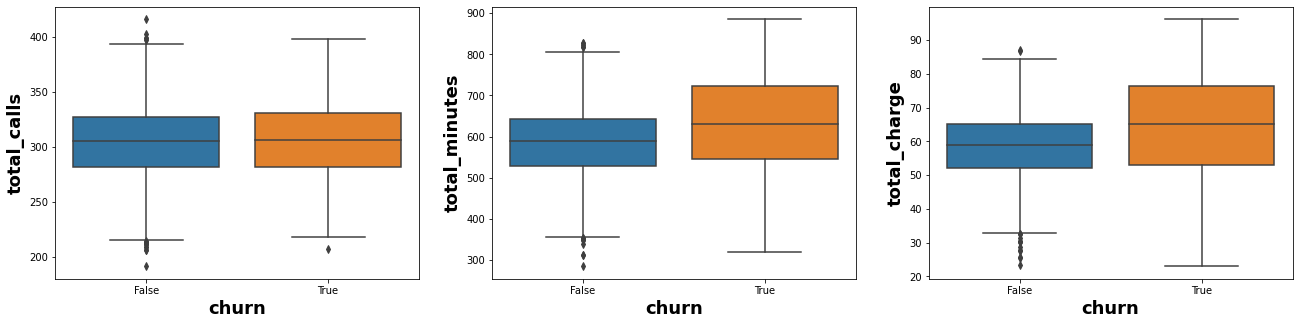

In [22]:
draw_box(df , ['churn'] , cols)

<AxesSubplot:>

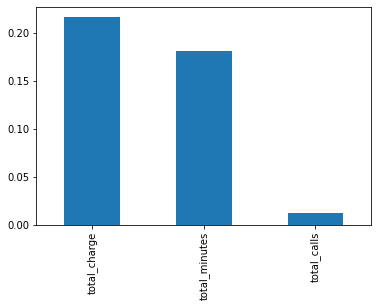

In [23]:
df.corr()['churn'][cols].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

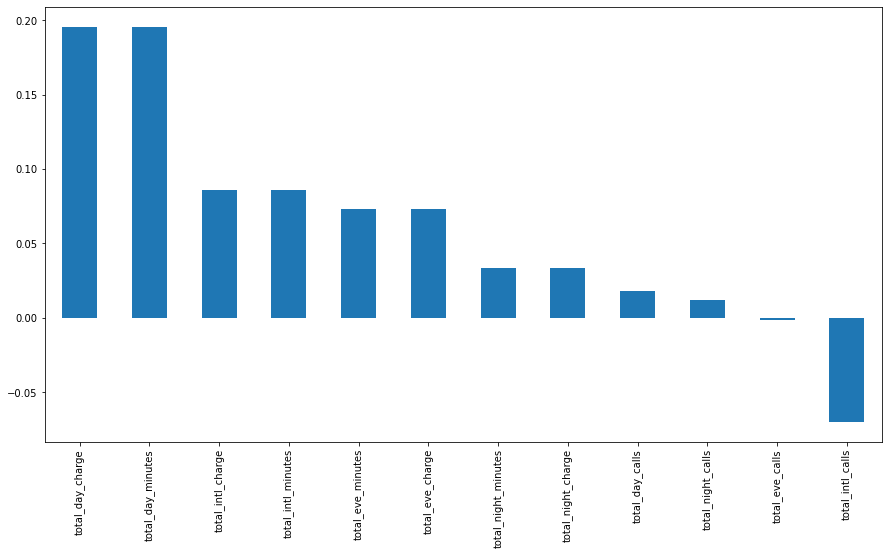

In [24]:
old_cols = ['total_day_calls' ,'total_eve_calls' ,'total_night_calls','total_intl_calls' , 'total_day_minutes' , 'total_eve_minutes',
         'total_night_minutes' ,  'total_intl_minutes' ,'total_day_charge' ,'total_eve_charge'  ,
         'total_night_charge','total_intl_charge']

plt.figure(figsize=(15,8))
df.corr()['churn'][old_cols].sort_values(ascending = False).plot(kind='bar')

#df.corr()['churn'][old_cols]

In [25]:
df.corr()['total_charge']['total_minutes']
# even after feature engnerring these tow columns are still correlated

0.8916142515192247

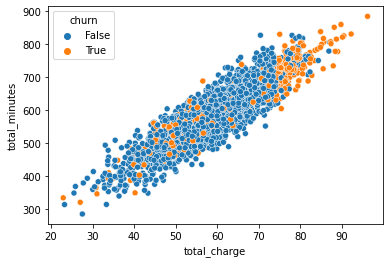

In [26]:
sns.scatterplot(data = df , x = 'total_charge' , y = 'total_minutes' , hue = 'churn');

- we can see that the new columns has better correlation with target column exept for `total_call` there is no much improvment
- and we can see that also from the boxplot as there is an overlap in `total_call` but there is that much overlap in the other two
- and we get high correlation between  `total_charge` and `total_minutes`

> version 2 :
- in first version i did not drop one of the correlated column so i will do that now and see the results
- i want to drop one of the correlated clounms , so let's see the boxplot to decided

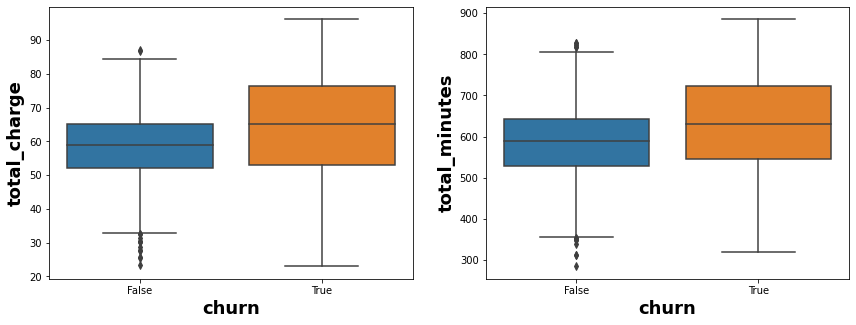

In [27]:
draw_box(df , ['churn'] , ['total_charge' , 'total_minutes'])

> there is no big difference , so i will drop `total min` as `total charge` gives more sense

### drop and change columns type :

In [28]:
df.drop('account_length' , axis = 1, inplace=True)
df.drop('state' , axis = 1, inplace=True)
# version 2 addition :
df.drop('total_minutes' , axis = 1, inplace=True)

In [29]:
df['international_plan'] = df['international_plan'].map({'Yes':1, 'No':0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'Yes':1, 'No':0})
df['churn'] = df['churn'].astype(int)

In [30]:
df.drop(old_cols, axis = 1, inplace = True)

In [31]:
df.head()

,area_code,international_plan,voice_mail_plan,number_vmail_messages,customer_service_calls,churn,total_calls,total_charge
0,san_francisco,0,1,25,1,0,303,75.56
1,san_francisco,0,1,26,1,0,332,59.24
2,san_francisco,0,0,0,0,0,333,62.29
3,san_jose,1,0,0,2,0,255,66.80
4,san_francisco,1,0,0,3,0,359,52.09


<a id='cleanning_summary'></a>
## cleanning_summary:

> summary :
  - i decided to drop `account lenght` column "in boxplot there was an overlap"
  - drop `state column` after analysis
  - i converted `area_code` from just numbers to it's area name
  - combain `total_day_calls` ,`total_eve_calls` ,`total_night_calls`,`total_intl_calls` to `total_calls`
  - combain `total_day_minutes` , `total_eve_minutes`, `total_night_minutes` ,  `total_intl_minutes` to `total_minutes`
  - combain `total_day_charge` ,`total_eve_charge` ,`total_night_charge`,`total_intl_charge`
  - droped the original columns
  - convert the cat columns `international_plan , voice_mail_plan , churn` to numerical
  - there is no missing data
  - there is no wrong data types 
  - there is no much columns so i will not consider doing any dim reduction

> we get from eda_script that out data is imbalanced 

<a id='features_normalize_and_onehot_encoding'></a>
## features_normalize and onehot encoding:

### now let's get the train data for modeling 

In [32]:
training_data = df.copy()

In [33]:
training_data.head()

,area_code,international_plan,voice_mail_plan,number_vmail_messages,customer_service_calls,churn,total_calls,total_charge
0,san_francisco,0,1,25,1,0,303,75.56
1,san_francisco,0,1,26,1,0,332,59.24
2,san_francisco,0,0,0,0,0,333,62.29
3,san_jose,1,0,0,2,0,255,66.80
4,san_francisco,1,0,0,3,0,359,52.09


> now let's normalize numerical col and get onehot encoder for categorical ones

In [34]:
norm_cols = ['number_vmail_messages', 'customer_service_calls', 'total_calls', 'total_charge']
# add total_minutes if you did not drop it

In [35]:
scaler = StandardScaler()
training_data[norm_cols] = scaler.fit_transform(training_data[norm_cols])

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#hotencoder = OneHotEncoder()
#training_data['area_code'] = hotencoder.fit_transform(training_data['area_code'])


ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='drop')
X = (ct.fit_transform(training_data))

In [37]:
X

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [38]:
training_data = pd.concat([training_data, pd.DataFrame(X)], axis=1)
training_data.drop('area_code' , axis = 1 , inplace= True)
training_data.head()

,international_plan,voice_mail_plan,number_vmail_messages,customer_service_calls,churn,total_calls,total_charge,0,1,2
0,0,1,1.247508,-0.429172,0,-0.055422,1.545571,0.0,1.0,0.0
1,0,1,1.320985,-0.429172,0,0.787235,-0.011704,0.0,1.0,0.0
2,0,0,-0.589414,-1.191955,0,0.816292,0.279331,0.0,1.0,0.0
3,1,0,-0.589414,0.333610,0,-1.450165,0.709681,0.0,0.0,1.0
4,1,0,-0.589414,1.096392,0,1.571778,-0.693966,0.0,1.0,0.0


In [39]:
y_train = training_data.pop('churn')
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

In [40]:
X_train = training_data.copy()
X_train = X_train.rename(columns={1: 'san_francisco', 0: 'northern_california' ,2:'san_jose'})
X_train.head()

,international_plan,voice_mail_plan,number_vmail_messages,customer_service_calls,total_calls,total_charge,northern_california,san_francisco,san_jose
0,0,1,1.247508,-0.429172,-0.055422,1.545571,0.0,1.0,0.0
1,0,1,1.320985,-0.429172,0.787235,-0.011704,0.0,1.0,0.0
2,0,0,-0.589414,-1.191955,0.816292,0.279331,0.0,1.0,0.0
3,1,0,-0.589414,0.333610,-1.450165,0.709681,0.0,0.0,1.0
4,1,0,-0.589414,1.096392,1.571778,-0.693966,0.0,1.0,0.0


<a id='dealing_with_imbalanced_data'></a>
## dealing_with_imbalanced_data:


> now before moving to building a model we still need to solve the problem of imbalanced data :
   - we can do that by oversampling or downsampling i will first try `oversampling`
   - we can use imblearn libary

In [41]:
from sklearn.utils import resample

In [42]:
X = pd.concat([X_train, y_train], axis=1)
X.head()

,international_plan,voice_mail_plan,number_vmail_messages,customer_service_calls,total_calls,total_charge,northern_california,san_francisco,san_jose,churn
0,0,1,1.247508,-0.429172,-0.055422,1.545571,0.0,1.0,0.0,0
1,0,1,1.320985,-0.429172,0.787235,-0.011704,0.0,1.0,0.0,0
2,0,0,-0.589414,-1.191955,0.816292,0.279331,0.0,1.0,0.0,0
3,1,0,-0.589414,0.333610,-1.450165,0.709681,0.0,0.0,1.0,0
4,1,0,-0.589414,1.096392,1.571778,-0.693966,0.0,1.0,0.0,0


In [43]:
# separate minority and majority classes
not_churn = X[X['churn']==0]
churn = X[X['churn']==1]

# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])

# check new class counts
upsampled['churn'].value_counts()

0    2278
1    2278
Name: churn, dtype: int64

> oversampling gave me more data 

> now i will have the data without upsampling and the data with upsampling so i compare the results

In [44]:
y_train_upsamle = upsampled['churn']
X_train_upsample = upsampled.drop('churn', axis=1)
X_train_upsample = X_train_upsample.rename(columns={1: 'san_francisco', 0: 'northern_california' ,2:'san_jose'})
# i get an error while using sklearn when col name was int so i changed it

<AxesSubplot:ylabel='churn'>

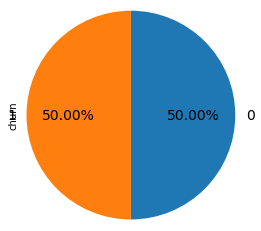

In [45]:
val_count = y_train_upsamle.value_counts()
y_train_upsamle.value_counts().plot.pie(autopct='%.2f%%',labels=val_count.index,startangle=90,counterclock=False , radius=1.2, textprops={'fontsize':14})

<a id='building_models'></a>
## building_models:

**1. logistic regression**

In [48]:
from sklearn.metrics import accuracy_score
log_model_cv = LogisticRegression(penalty='l2' , C = 0.3)

X_train, X_val, y_train, y_val = train_test_split(X_train_upsample, y_train_upsamle, test_size=0.2, random_state=101)

log_model_cv.fit(X_train,y_train )
predict = log_model_cv.predict(X_val)
log_model_cv_score = roc_auc_score(predict,y_val)
print(log_model_cv_score)
pd.DataFrame(confusion_matrix(predict,y_val))


0.7644095035399384


,0,1
0,359,124
1,92,337


In [49]:
sgd_log_classifier  = SGDClassifier(loss = 'log_loss' , penalty='l2' , alpha=0.0001)
sgd_log_classifier.fit(X_train,y_train )
predict = sgd_log_classifier.predict(X_val)
sgd_log_classifier_score = accuracy_score(predict,y_val)
print(sgd_log_classifier_score)
pd.DataFrame(confusion_matrix(predict,y_val))

# note : if we run this cell another time it will get us another score

0.7554824561403509


,0,1
0,373,145
1,78,316


> so using logistic regression with batch gradient and SGD give the same result

**2. Random Forest**

we know that random forest can deal with imbalanced data so we will see

In [50]:
param_grid = [
    {'n_estimators':[1,3,5,10,15,20,25,30] , 'max_features' :[2,4,6,8,10] , 'min_samples_split' :[3,5,10,15]}
]

In [51]:
forest = RandomForestClassifier()
forest_grid_search = GridSearchCV(forest , param_grid  ,cv=5 , scoring = 'roc_auc' , return_train_score=True)
forest_grid_search.fit(X_train_upsample , y_train_upsamle)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'min_samples_split': [3, 5, 10, 15],
                          'n_estimators': [1, 3, 5, 10, 15, 20, 25, 30]}],
             return_train_score=True, scoring='roc_auc')

In [52]:
forest_grid_search.best_estimator_

RandomForestClassifier(max_features=4, min_samples_split=3, n_estimators=30)

In [53]:
forest_score = forest_grid_search.best_score_
print(forest_score)

0.9987165091372155


In [54]:
predict = forest_grid_search.predict(X_train_upsample)
pd.DataFrame(confusion_matrix(predict,y_train_upsamle))

,0,1
0,2278,0
1,0,2278


**3. SVC**

In [62]:
svc_model = SVC()
param_grid = [
    {'kernel':['rbf' , 'poly'] , 'degree' :[1,2,3,4,5,6,7,8] }
] 
svc_grid_search = GridSearchCV(svc_model , param_grid  ,cv=5 , scoring = 'roc_auc' , return_train_score=True)
svc_grid_search.fit(X_train_upsample , y_train_upsamle)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'degree': [1, 2, 3, 4, 5, 6, 7, 8],
                          'kernel': ['rbf', 'poly']}],
             return_train_score=True, scoring='roc_auc')

In [63]:
svc_grid_search.best_params_

{'degree': 7, 'kernel': 'poly'}

In [64]:
svc_score = svc_grid_search.best_score_
print(svc_score)

0.9435333547262218


In [65]:
predict = svc_grid_search.predict(X_train_upsample)
pd.DataFrame(confusion_matrix(predict,y_train_upsamle))

,0,1
0,2217,446
1,61,1832


In [68]:
sgd_svc_classifier  = SGDClassifier(loss = 'hinge' , penalty='l2') # SVC takes l2
sgd_svc_classifier.fit(X_train,y_train )
predict = sgd_svc_classifier.predict(X_val)
sgd_svc_classifier_score = roc_auc_score(predict,y_val)
print(sgd_svc_classifier_score)
pd.DataFrame(confusion_matrix(predict,y_val))


0.7587487433076623


,0,1
0,340,109
1,111,352


> `sgd_svc_classifier` gives better performance than `svc`

**4. XGBoosting**

In [69]:
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
              'n_estimators': [10,20,30,40,50],
              'max_depth': [2, 4, 6, 8 ,10],
              'subsample': [0.1, 0.3, 0.6, 0.9]
              
             }    
xgb_model = XGBClassifier()

In [70]:
xg_grid_search = GridSearchCV(xgb_model , param_grid  ,cv=5 , scoring = 'roc_auc' , return_train_score=True)
xg_grid_search.fit(X_train_upsample , y_train_upsamle)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'subsample': [0.1, 0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc')

In [72]:
print(xg_grid_search.best_params_)
xg_score = xg_grid_search.best_score_
print(xg_score)
predict = xg_grid_search.predict(X_train_upsample)
pd.DataFrame(confusion_matrix(predict,y_train_upsamle))

{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.9}
0.9974798247305172


,0,1
0,2278,0
1,0,2278


**5. Naive Bayes**

In [76]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predict = gnb.predict(X_val)
gnb_score = roc_auc_score(predict,y_val)
print(gnb_score)
pd.DataFrame(confusion_matrix(predict,y_val))

0.8330523010025366


,0,1
0,392,95
1,59,366


**6. ADA Boost**

In [77]:
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
              'n_estimators': [10,20,30,40,50]
             } 

ada = AdaBoostClassifier()
ada_grid_search = GridSearchCV(ada , param_grid  ,cv=5 , scoring = 'roc_auc' , return_train_score=True)
ada_grid_search.fit(X_train_upsample , y_train_upsamle)

print(ada_grid_search.best_params_)
ada_score = ada_grid_search.best_score_
print(ada_score)
predict = ada_grid_search.predict(X_train_upsample)
pd.DataFrame(confusion_matrix(predict,y_train_upsamle))

{'learning_rate': 0.6, 'n_estimators': 50}
0.913468674004512


,0,1
0,2008,330
1,270,1948


### results :
- both XGBoosting and random forest gaves me the best results , then SVC , adaboosting , naive bayes and logistic regression

<a id='load_test_set'></a>
## load_test_set:
### now let's see the test set
- note : because all the model with the imbalanced data gave bad result , i will test only on model the had trained using the balanced data

DataFrame : 


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


data info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   667 non-null    object 
 1   account_length          667 non-null    int64  
 2   area_code               667 non-null    int64  
 3   international_plan      667 non-null    object 
 4   voice_mail_plan         667 non-null    object 
 5   number_vmail_messages   667 non-null    int64  
 6   total_day_minutes       667 non-null    float64
 7   total_day_calls         667 non-null    int64  
 8   total_day_charge        667 non-null    float64
 9   total_eve_minutes       667 non-null    float64
 10  total_eve_calls         667 non-null    int64  
 11  total_eve_charge        667 non-null    float64
 12  total_night_minutes     667 non-null    float64
 13  total_night_calls       667 non-null    int64  
 14  total_night_charge      667 n

,count,mean,std,min,25%,50%,75%,max
account_length,667.0,102.841079,40.819480,1.00,76.00,102.00,128.000,232.00
area_code,667.0,436.157421,41.783305,408.00,408.00,415.00,415.000,510.00
number_vmail_messages,667.0,8.407796,13.994480,0.00,0.00,0.00,20.000,51.00
total_day_minutes,667.0,180.948126,55.508628,25.90,146.25,178.30,220.700,334.30
total_day_calls,667.0,100.937031,20.396790,30.00,87.50,101.00,115.000,165.00
total_day_charge,667.0,30.761769,9.436463,4.40,24.86,30.31,37.520,56.83
total_eve_minutes,667.0,203.355322,49.719268,48.10,171.05,203.70,236.450,361.80
total_eve_calls,667.0,100.476762,18.948262,37.00,88.00,101.00,113.000,168.00
total_eve_charge,667.0,17.285262,4.226160,4.09,14.54,17.31,20.095,30.75
total_night_minutes,667.0,199.685307,49.759931,23.20,167.95,201.60,231.500,367.70


NaN percentage for each column : 


,name,percentage
0,state,0.0%
1,account_length,0.0%
2,area_code,0.0%
3,international_plan,0.0%
4,voice_mail_plan,0.0%
5,number_vmail_messages,0.0%
6,total_day_minutes,0.0%
7,total_day_calls,0.0%
8,total_day_charge,0.0%
9,total_eve_minutes,0.0%


there is no NaNs in data to impute
check skewness for numerical after imputing : 


,col_name,skew_value,skew_type
0,account_length,0.153,positive
1,area_code,1.192,positive
2,number_vmail_messages,1.236,positive
3,total_day_minutes,0.058,positive
4,total_day_calls,-0.053,negative
5,total_day_charge,0.058,positive
6,total_eve_minutes,-0.065,negative
7,total_eve_calls,-0.001,negative
8,total_eve_charge,-0.065,negative
9,total_night_minutes,-0.056,negative


count values for categorical columns : 
state column's count values : 


,value,count
0,AZ,19
1,ND,18
2,WV,18
3,NJ,18
4,KS,18
5,NM,18
6,WA,18
7,RI,17
8,ID,17
9,MS,17


international_plan column's count values : 


,value,count
0,No,614
1,Yes,53


voice_mail_plan column's count values : 


,value,count
0,No,478
1,Yes,189


churn column's count values : 


,value,count
0,False,572
1,True,95


some plots : 


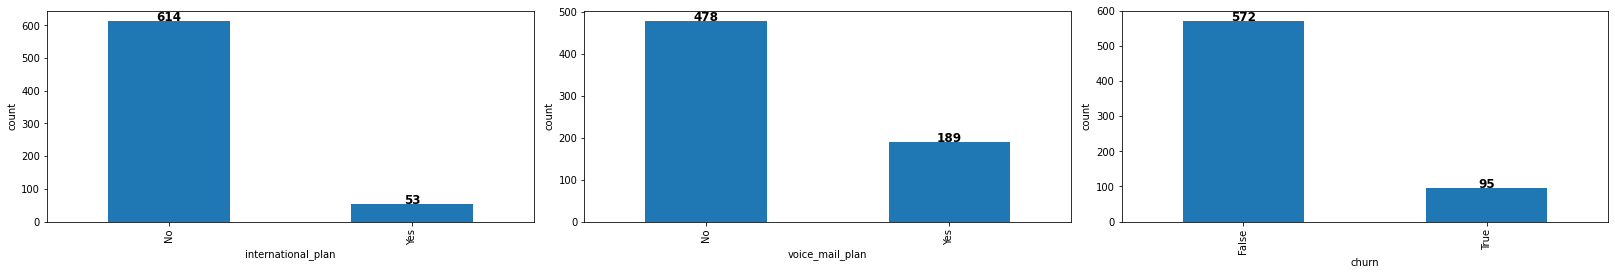

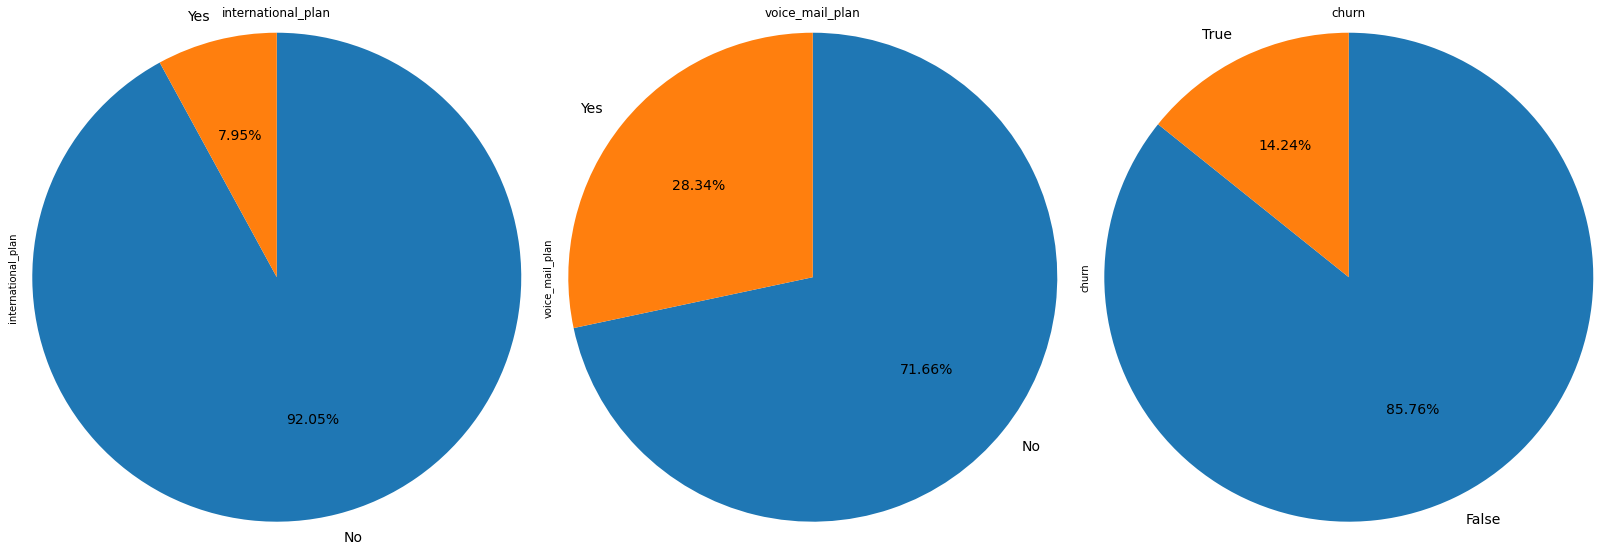

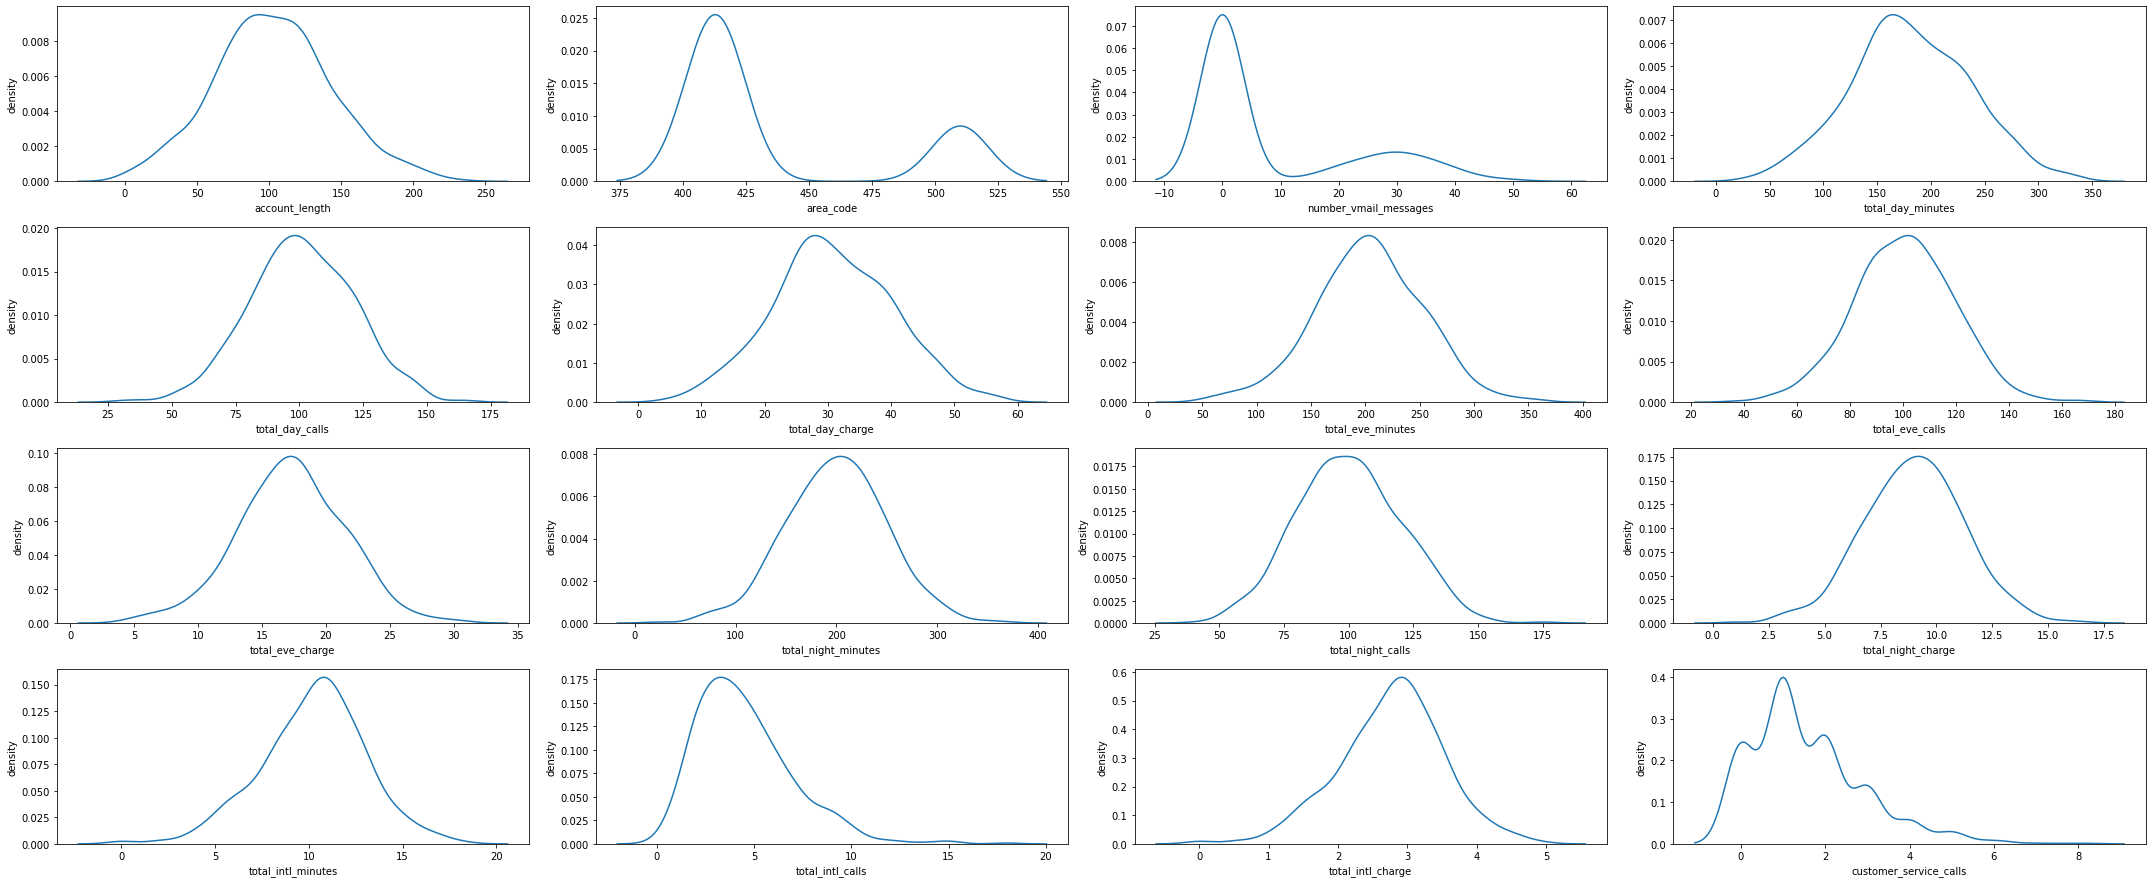

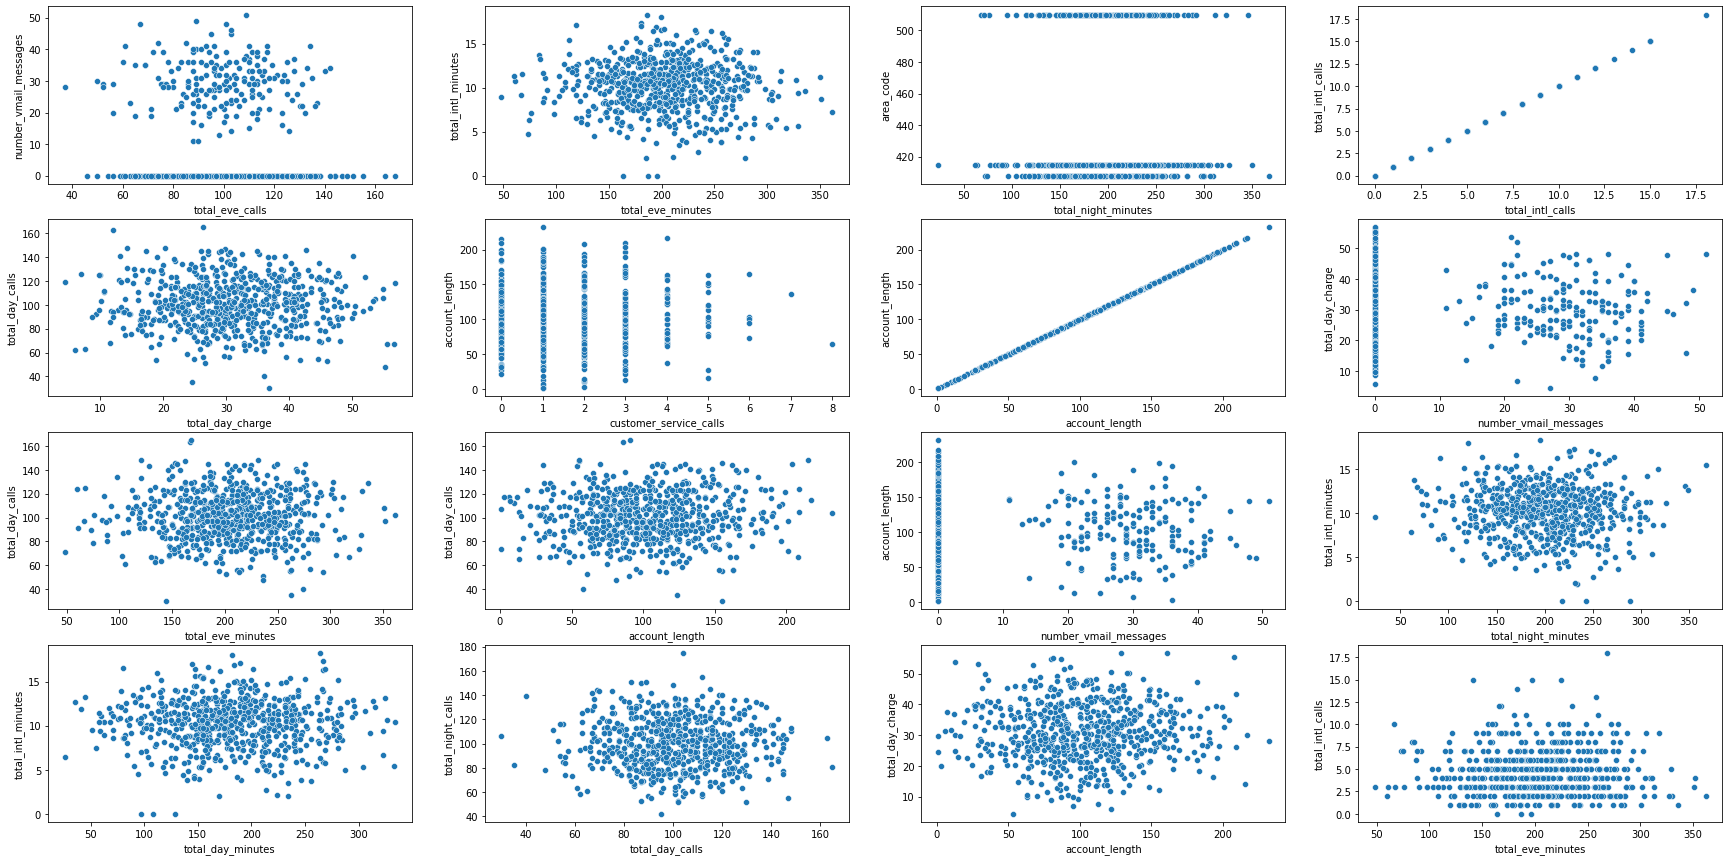

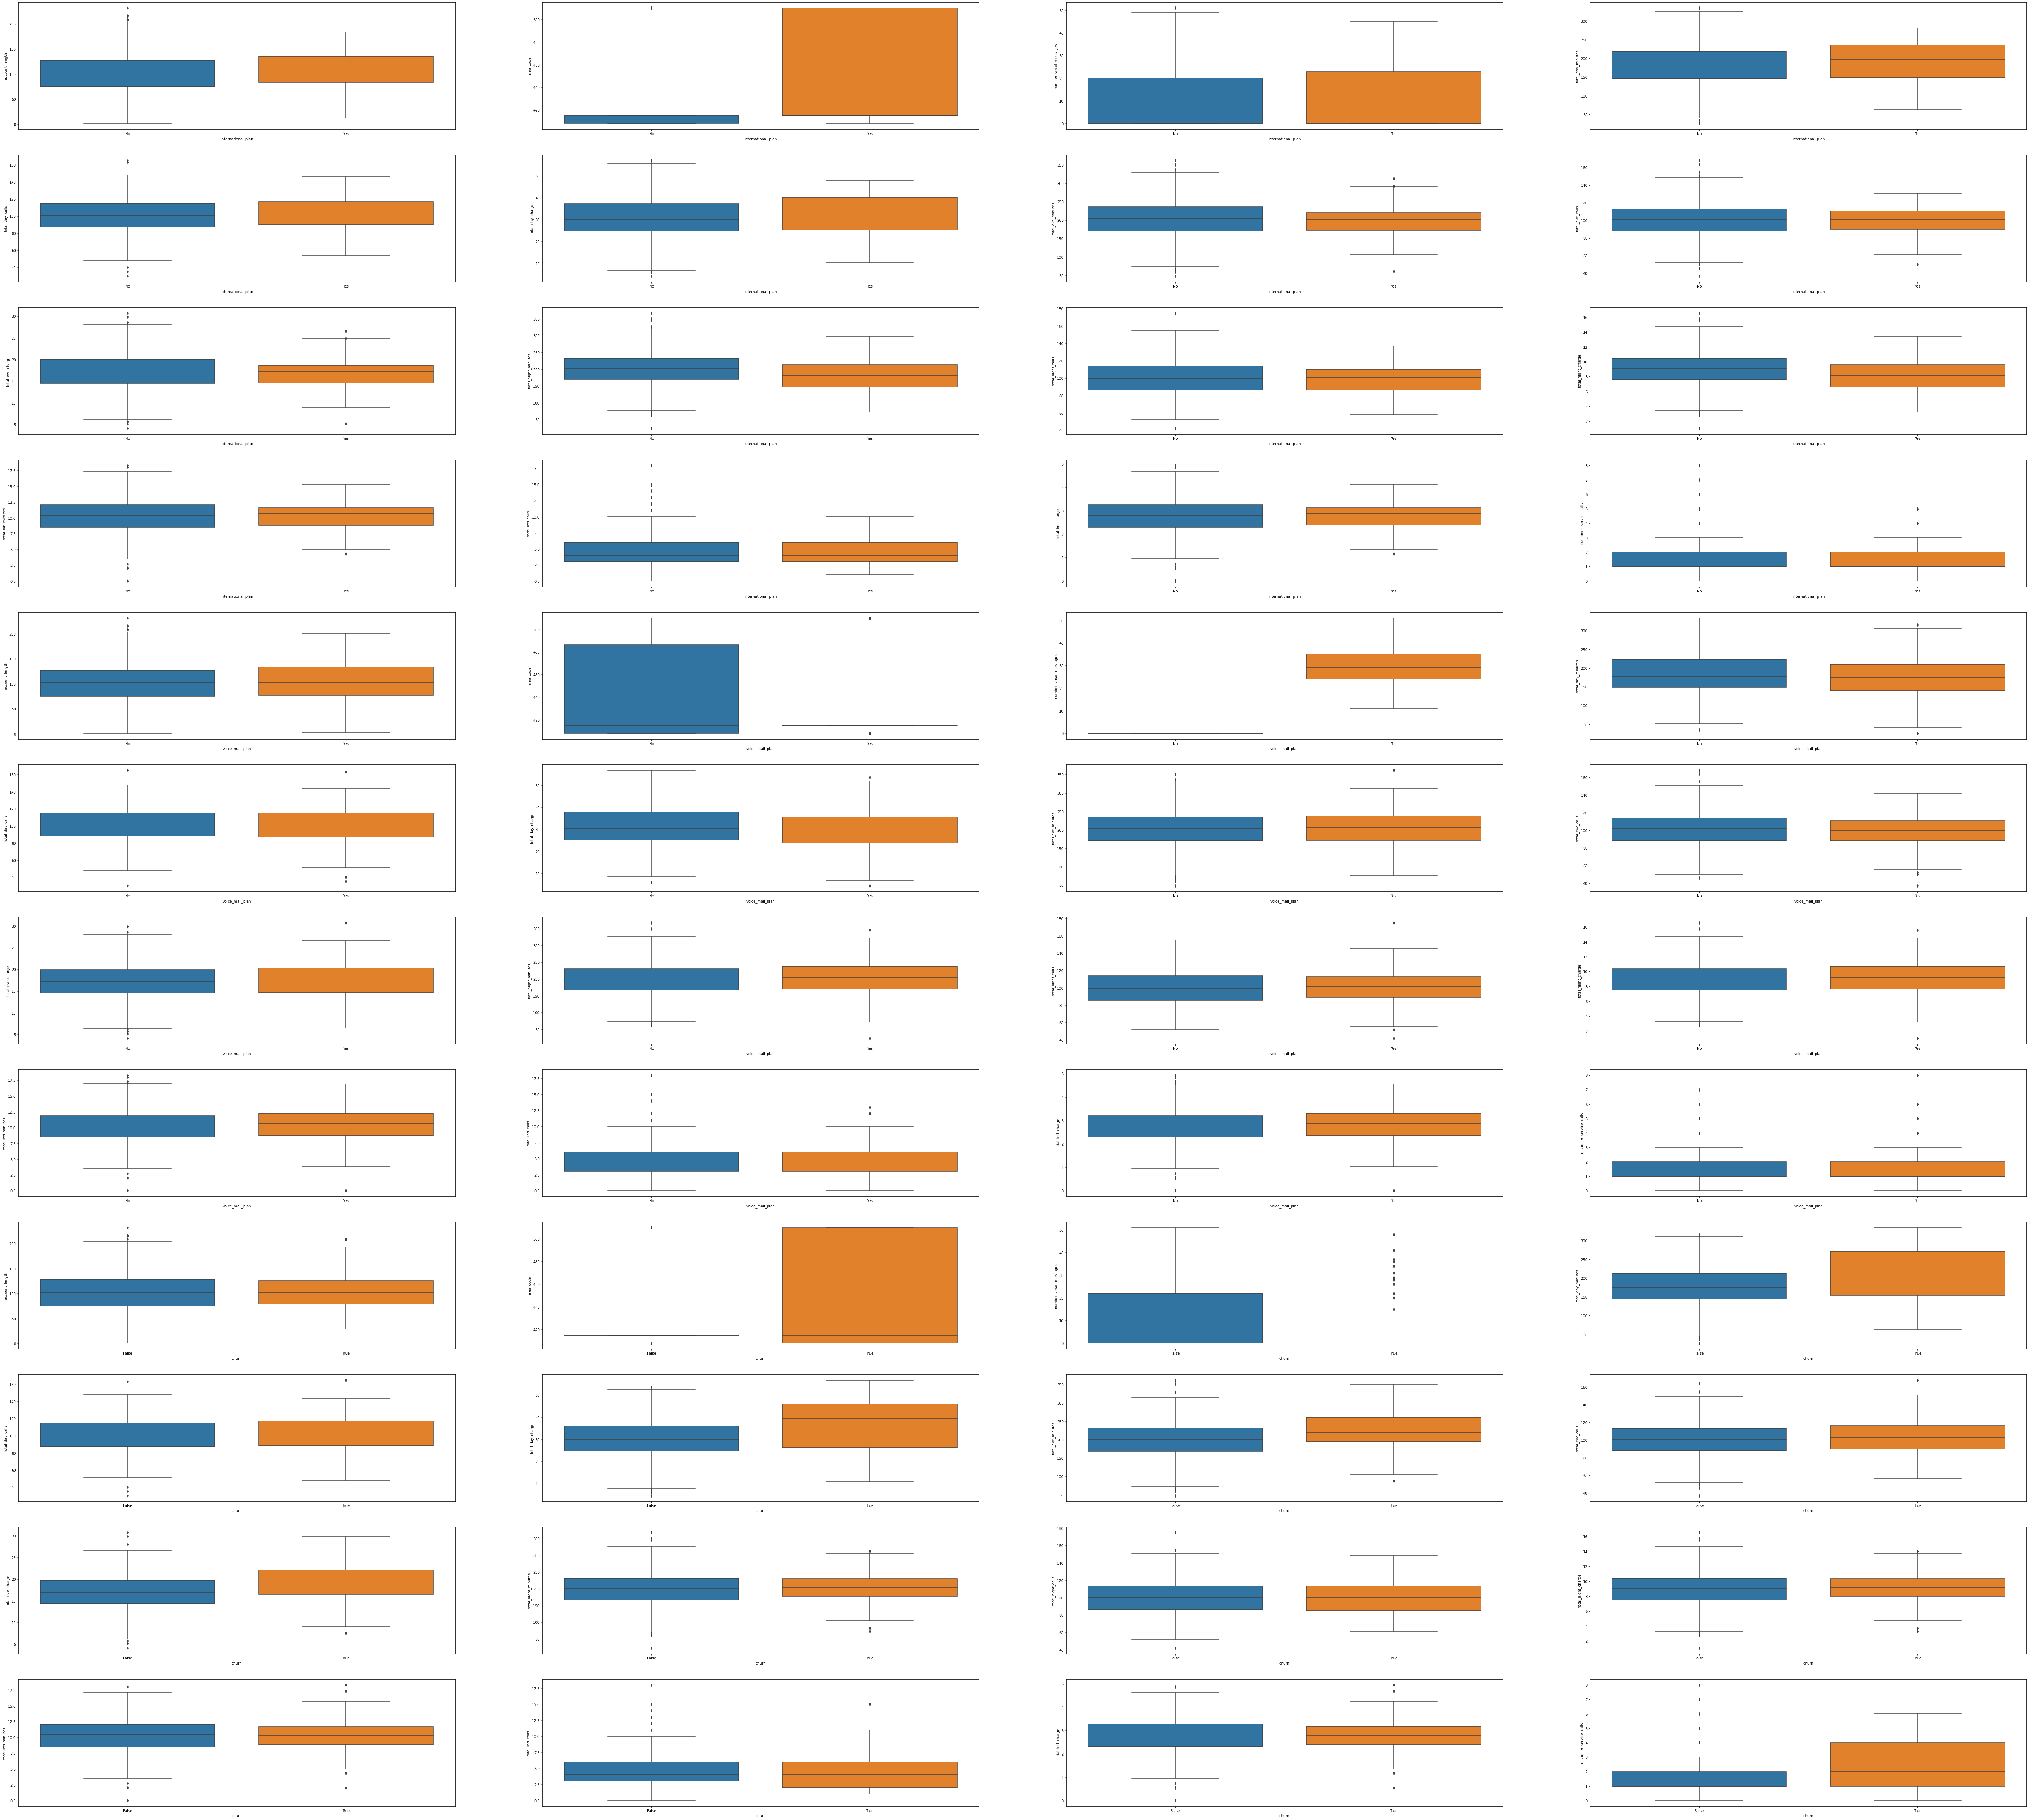

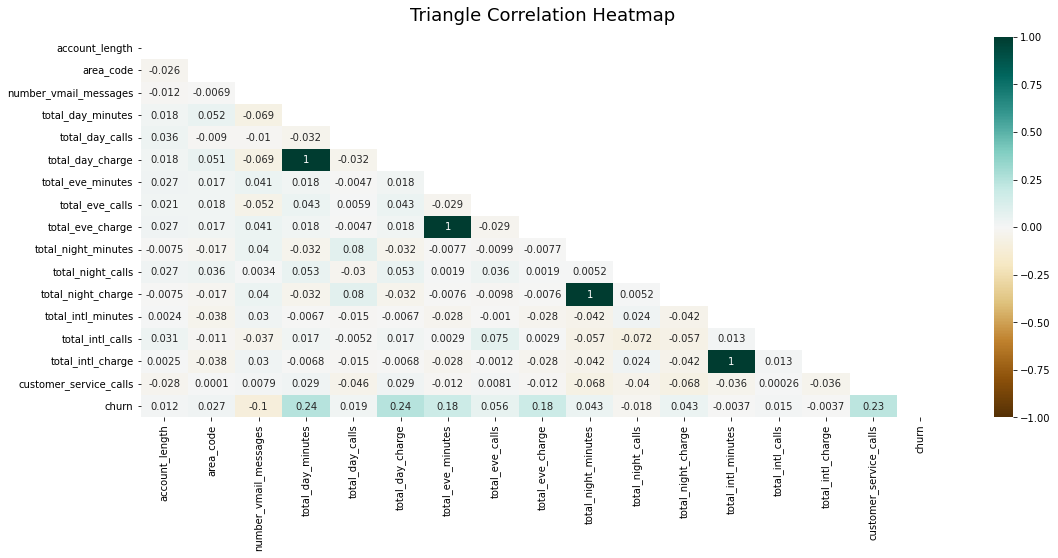

In [78]:
df = eda_script('./churn-bigml-20.csv')

> we can see that test data almost has the same dist as training data

In [79]:
def data_preprocessing( df: pd.DataFrame)  -> pd.DataFrame : 
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_') # the same idea to use str methods i should use .str
    
    df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls'] 
    df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
    df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']+ df['total_intl_charge']
    
    df.drop(old_cols, axis = 1, inplace = True)
    df.drop('account_length' , axis = 1, inplace=True)
    df.drop('state' , axis = 1, inplace=True)
    ##### version 2 addition :
    df.drop('total_minutes' , axis = 1, inplace=True)
    #####
    df['area_code'] = df['area_code'].replace(415,'san_francisco')
    df['area_code'] = df['area_code'].replace(408,'san_jose')
    df['area_code'] = df['area_code'].replace(510,'northern_california')
    
    df['international_plan'] = df['international_plan'].map({'Yes':1, 'No':0})
    df['voice_mail_plan'] = df['voice_mail_plan'].map({'Yes':1, 'No':0})
    df['churn'] = df['churn'].astype(int)
    
    return df

<a id='transfer_test_set_as_We_did_with_train_set'></a>
## transfer_test_set_as_We_did_with_train_set:

In [80]:
df = data_preprocessing(df)

In [81]:
df.head()

,area_code,international_plan,voice_mail_plan,number_vmail_messages,customer_service_calls,churn,total_calls,total_charge
0,san_jose,0,0,0,1,0,271,73.32
1,san_francisco,0,0,0,4,1,337,54.20
2,san_francisco,0,0,0,4,1,301,92.29
3,san_francisco,0,0,0,2,0,316,41.05
4,northern_california,0,0,0,1,0,317,49.60


- cleaning the test data as we cleaned the train 

In [82]:
test_data = df.copy()

test_data[norm_cols] = scaler.transform(test_data[norm_cols])

X = (ct.transform(test_data))

test_data = pd.concat([test_data, pd.DataFrame(X)], axis=1)
test_data.drop('area_code' , axis = 1 , inplace= True)

X_test= test_data.copy()
y_test = X_test.pop('churn')

X_test = X_test.rename(columns={1: 'san_francisco', 0: 'northern_california' ,2:'san_jose'})
X_test.head()

,international_plan,voice_mail_plan,number_vmail_messages,customer_service_calls,total_calls,total_charge,northern_california,san_francisco,san_jose
0,0,0,-0.589414,-0.429172,-0.985251,1.331827,0.0,0.0,1.0
1,0,0,-0.589414,1.859175,0.932521,-0.492627,0.0,1.0,0.0
2,0,0,-0.589414,1.859175,-0.113536,3.141968,0.0,1.0,0.0
3,0,0,-0.589414,0.333610,0.322321,-1.747416,0.0,1.0,0.0
4,0,0,-0.589414,-0.429172,0.351378,-0.931565,1.0,0.0,0.0


<a id='apply_trained_models_on_test_set'></a>
## apply_trained_models_on_test_set:

**1. test_log**

In [87]:
# from sklearn.metrics import roc_auc_score
predict = log_model_cv.predict(X_test)
log_model_cv_score_test = accuracy_score(predict,y_test)
print(log_model_cv_score_test)
pd.DataFrame(confusion_matrix(predict,y_test))


0.7841079460269865


,0,1
0,447,19
1,125,76


**2. test_log_SGD**

In [88]:
predict = sgd_log_classifier.predict(X_test)
sgd_log_classifier_test = accuracy_score(predict,y_test)
print(sgd_log_classifier_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.7856071964017991


,0,1
0,456,27
1,116,68


> `logisti`c model gives us better performance than `log_SGD`

**3. test_SVC**

In [89]:
predict = svc_grid_search.predict(X_test)
SVC_score_test = accuracy_score(predict,y_test)
print(SVC_score_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.9235382308845578


,0,1
0,546,25
1,26,70


**4. test_SVC_SGD**

In [90]:
sgd_svc_classifier
predict = sgd_svc_classifier.predict(X_test)
sgd_svc_classifier_test = accuracy_score(predict,y_test)
print(sgd_svc_classifier_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.7541229385307346


,0,1
0,424,16
1,148,79


> so also with SVC , SGD preform well in traing but not that good with testing 

**5. test_forest**

In [91]:
predict = forest_grid_search.predict(X_test)
forest_score_test = accuracy_score(predict,y_test)
print(forest_score_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.9505247376311844


,0,1
0,556,17
1,16,78


**6. test_XGBoosting**

In [92]:
predict = xg_grid_search.predict(X_test)
xg_score_test = accuracy_score(predict,y_test)
print(xg_score_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.9475262368815592


,0,1
0,555,18
1,17,77


**7. test_ADA Boost**

In [96]:
predict = ada_grid_search.predict(X_test)
ada_score_test = accuracy_score(predict,y_test)
print(ada_score_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.8725637181409296


,0,1
0,499,12
1,73,83


**8. test_naive base**

In [94]:
predict = gnb.predict(X_test)
gnb_score_test = accuracy_score(predict,y_test)
print(gnb_score_test)
pd.DataFrame(confusion_matrix(predict,y_test))

0.8710644677661169


,0,1
0,501,15
1,71,80


<a id='compare_results'></a>
## compare_results:

In [97]:
result = [[log_model_cv_score , log_model_cv_score_test],
          [sgd_log_classifier_score , sgd_log_classifier_test],
          [svc_score , SVC_score_test],
          [sgd_svc_classifier_score , sgd_svc_classifier_test],
          [forest_score , forest_score_test],
          [xg_score , xg_score_test],
          [ada_score , ada_score_test],
          [gnb_score , gnb_score_test]]

In [98]:
result_df = pd.DataFrame(result , columns=['train','test'] , index=['log' ,'sgd_log' , 'SVC','SGD_SVC','forest','xg' , 'ada' ,'gnb'])

In [99]:
# train result using `roc_auc_score`
result_df

,train,test
log,0.764410,0.784108
sgd_log,0.755482,0.785607
SVC,0.943533,0.923538
SGD_SVC,0.758749,0.754123
forest,0.998717,0.950525
xg,0.997480,0.947526
ada,0.913469,0.872564
gnb,0.833052,0.871064


- the best performance goes to random forest and then XGBoosting
- and the worest performance was SGD_SVC